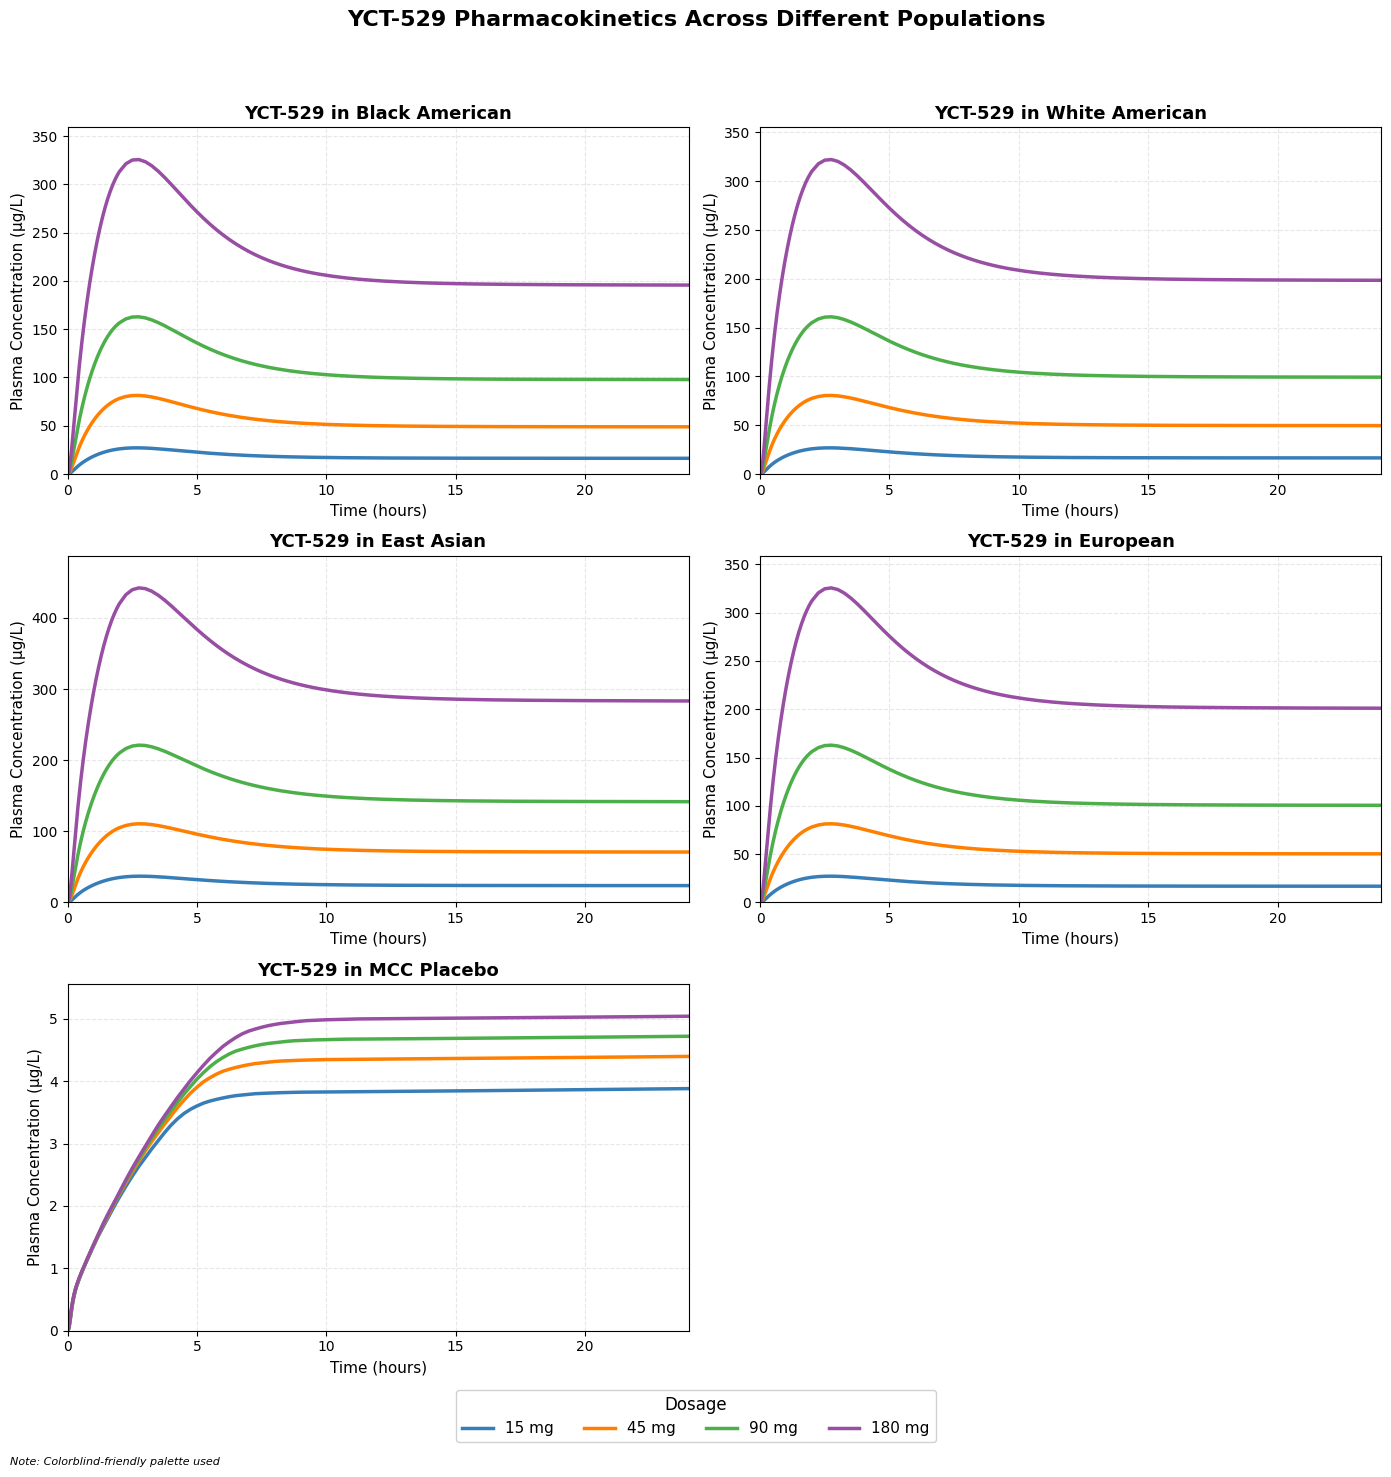

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

# Define file paths
file_paths = {
    "Black American": {
        "results": "BAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "BAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "White American": {
        "results": "WAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "WAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "East Asian": {
        "results": "EastAsianMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EastAsianMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "European": {
        "results": "EuroMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EuroMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "MCC Placebo": {
        "results": "MCC Placebo Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "MCC Placebo Aggregated Sim Protocol-PK-Analyses.csv"
    }
}

# Define colorblind-friendly colors for different doses
dose_colors = {
    15: "#377eb8",    # Blue
    45: "#ff7f00",    # Orange
    90: "#4daf4a",    # Green
    180: "#984ea3"    # Purple (replacing red)
}

# Set up subplots (2 columns, 3 rows)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
axes = axes.flatten()  # Flatten to make indexing easier

# Process and plot data for each race
for idx, (race, files) in enumerate(file_paths.items()):
    # Load results data
    df_results = pd.read_csv(files["results"])

    # Convert time from minutes to hours
    df_results["Time (hours)"] = df_results["Time [min]"] / 60

    ax = axes[idx]  # Select subplot

    # Plot for each dosage level
    for dose in sorted(df_results["Dosage (mg)"].unique()):
        df_dose = df_results[df_results["Dosage (mg)"] == dose]

        # Group by time and compute mean concentration
        grouped = df_dose.groupby("Time (hours)")["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"]
        mean_conc = grouped.mean() * 435.5  # Convert µmol/L to µg/L using molecular weight

        ax.plot(mean_conc.index, mean_conc,
                label=f"{dose} mg",
                color=dose_colors[dose],
                linewidth=2.5)

    # Formatting the subplot
    ax.set_xlabel("Time (hours)", fontsize=11)
    ax.set_ylabel("Plasma Concentration (µg/L)", fontsize=11)
    ax.set_title(f"YCT-529 in {race}", fontsize=13, fontweight='bold')

    # Consistent x-axis limits
    ax.set_xlim(0, 24)

    # Add light grid for better readability
    ax.grid(True, linestyle='--', alpha=0.3)

    # Set a clean background
    ax.set_facecolor('#ffffff')

    # Format tick parameters
    ax.tick_params(axis='both', labelsize=10)

    # Remove individual legends
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Hide any empty subplots (if race count is odd)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Create a single legend for all plots at the bottom
legend_elements = [Line2D([0], [0], color=dose_colors[dose], lw=2.5, label=f"{dose} mg")
                  for dose in sorted(dose_colors.keys())]

fig.legend(handles=legend_elements,
           loc='lower center',
           ncol=4,  # 4 doses in a single row
           bbox_to_anchor=(0.5, 0.02),
           fontsize=11,
           title="Dosage",
           title_fontsize=12,
           frameon=True,
           framealpha=0.9)

# Add more space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.25)

# Add an overall title
fig.suptitle("YCT-529 Pharmacokinetics Across Different Populations",
             fontsize=16, fontweight='bold', y=0.98)

# Add a colorblind-friendly note
fig.text(0.01, 0.01, "Note: Colorblind-friendly palette used",
         fontsize=8, style='italic')

# Adjust y-axis scales appropriately (different for placebo)
for i, ax in enumerate(axes[:5]):  # First 5 plots (non-placebo)
    ax.set_ylim(bottom=0)
    # Automatically set the top limit a bit higher than the maximum value
    ax.set_ylim(top=ax.get_ylim()[1] * 1.05)

# Set consistent major grid lines
for ax in axes:
    if ax.get_figure() is not None:  # Check if the axis is still part of the figure
        ax.xaxis.set_major_locator(MultipleLocator(5))

# Adjust layout to make room for the bottom legend
plt.tight_layout(rect=[0, 0.06, 1, 0.95])

# Save the figure with high DPI
plt.savefig('YCT529_PK_By_Race.png', dpi=300, bbox_inches='tight')

plt.show()

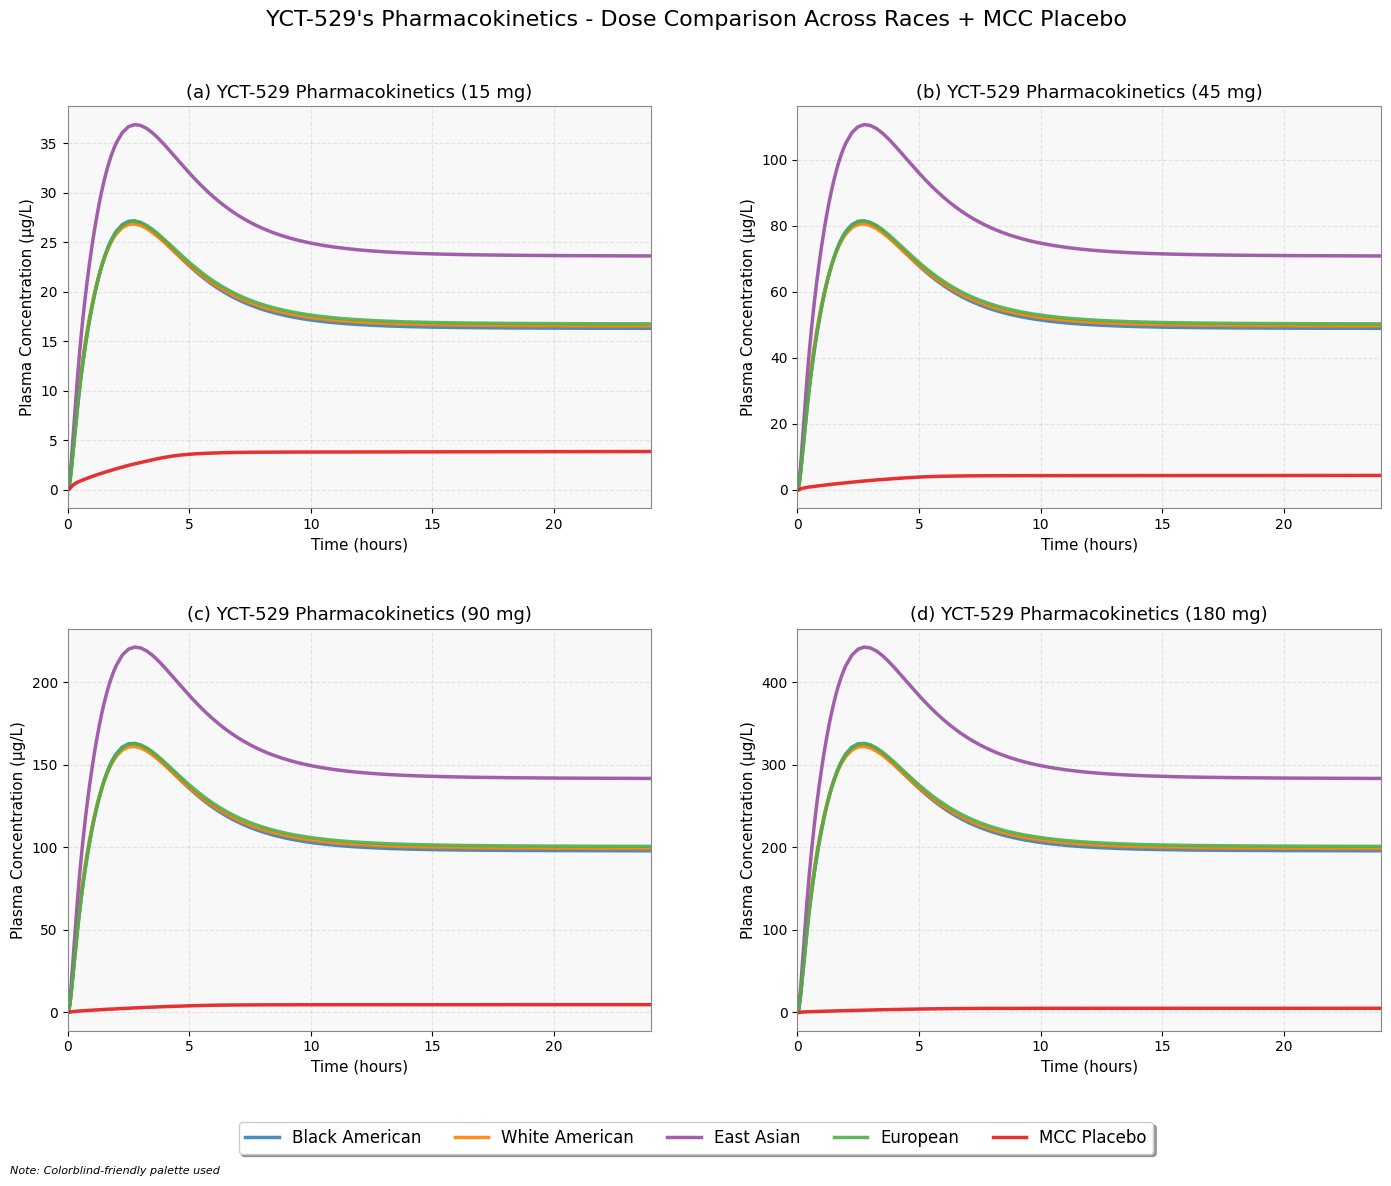

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define file paths
file_paths = {
    "Black American": {
        "results": "BAM Aggregated Sim Protocol-Results.csv"
    },
    "White American": {
        "results": "WAM Aggregated Sim Protocol-Results.csv"
    },
    "East Asian": {
        "results": "EastAsianMen Aggregated Sim Protocol-Results.csv"
    },
    "European": {
        "results": "EuroMen Aggregated Sim Protocol-Results.csv"
    },
    "MCC Placebo": {
        "results": "MCC Placebo Aggregated Sim Protocol-Results.csv"
    }
}

# Using a colorblind-friendly palette from ColorBrewer
race_colors = {
    "Black American": "#377eb8",    # Blue
    "White American": "#ff7f00",    # Orange
    "East Asian": "#984ea3",        # Purple
    "European": "#4daf4a",          # Green
    "MCC Placebo": "#e41a1c"        # Red
}
# Define subplot labels
subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

# Set up subplots (2 columns, 2 rows for 4 doses)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to make indexing easier

# Process and plot data for each dosage
for idx, (dose, label) in enumerate(zip([15, 45, 90, 180], subplot_labels)):
    ax = axes[idx]  # Select subplot

    for race, files in file_paths.items():
        # Load results data
        df_results = pd.read_csv(files["results"])

        # Convert time from minutes to hours
        df_results["Time (hours)"] = df_results["Time [min]"] / 60

        # Filter for the given dose
        df_dose = df_results[df_results["Dosage (mg)"] == dose]

        # Group by time and compute mean concentration
        grouped = df_dose.groupby("Time (hours)")["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"]
        mean_conc = grouped.mean() * 435.5  # Convert µmol/L to µg/L using molecular weight

        # Plot with better line styling
        ax.plot(mean_conc.index, mean_conc, label=race, color=race_colors[race],
                linewidth=2.5, alpha=0.9)

    # Formatting the subplot
    ax.set_xlabel("Time (hours)", fontsize=11)
    ax.set_ylabel("Plasma Concentration (µg/L)", fontsize=11)
    ax.set_title(f"{label} YCT-529 Pharmacokinetics ({dose} mg)", fontsize=13)

    # Improve grid appearance
    ax.grid(True, linestyle='--', alpha=0.3)

    # Set x-axis limit consistently across all plots
    ax.set_xlim(0, 24)

    # Add light background to improve contrast
    ax.set_facecolor('#f8f8f8')

    # Format tick labels
    ax.tick_params(axis='both', labelsize=10)

    # Add a subtle box around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('#888888')
        spine.set_linewidth(0.8)

# Create a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.06),
                   ncol=5, frameon=True, fontsize=12, fancybox=True, shadow=True)

# Remove individual legends
for ax in axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Add overall title for all subplots
fig.suptitle("YCT-529's Pharmacokinetics - Dose Comparison Across Races + MCC Placebo",
             fontsize=16, y=0.98)

# Add a note about colorblind accessibility
fig.text(0.01, 0.01, "Note: Colorblind-friendly palette used", fontsize=8, style='italic')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.08, 1, 0.96])  # Leave space at the top for the title and bottom for the legend
plt.subplots_adjust(wspace=0.25, hspace=0.3)  # Adjust spacing between subplots

# Save the figure with high DPI
plt.savefig('YCT529_PK_Dose_Comparison.png', dpi=300, bbox_inches='tight')

plt.show()

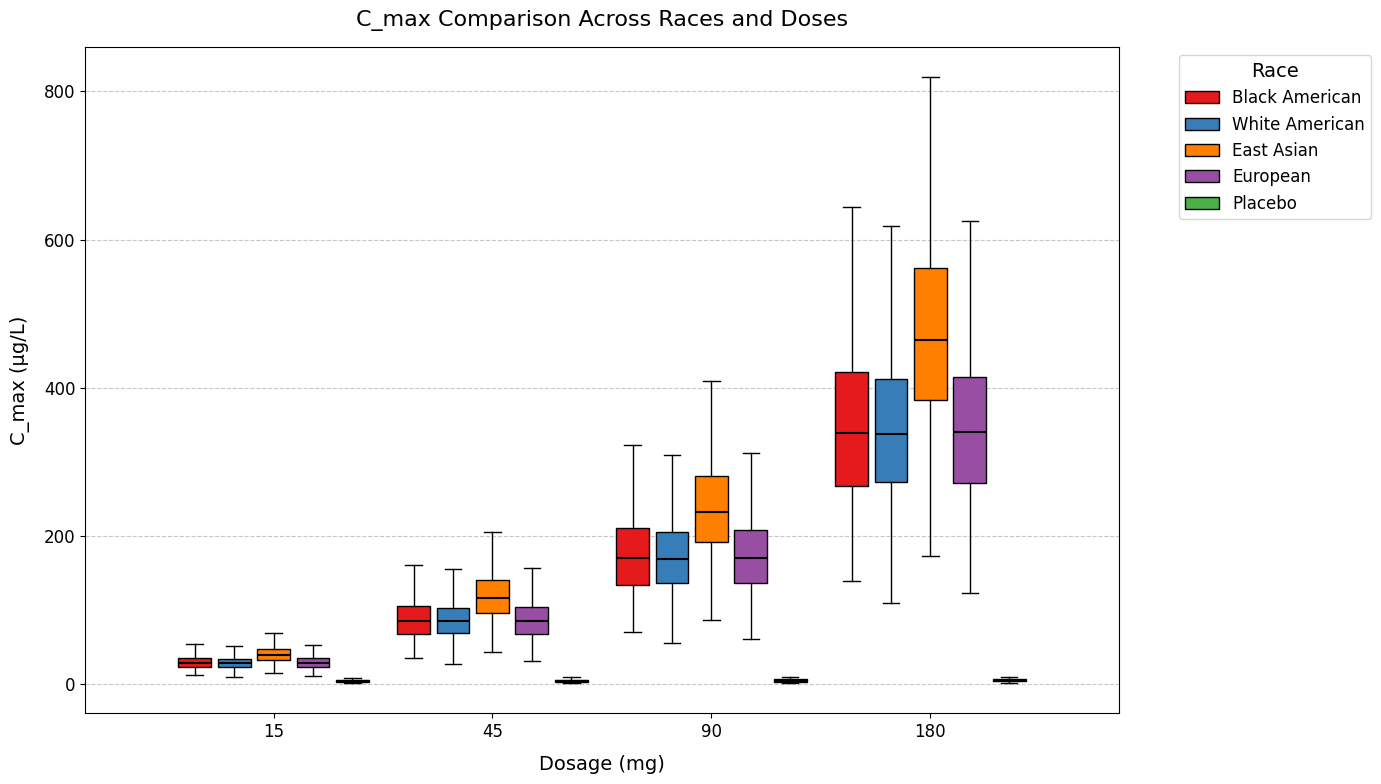

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Set publication-quality parameters with larger text
plt.rcParams.update({
    'font.size': 12,            # Increased base font size
    'axes.labelsize': 14,       # Larger axis labels
    'axes.titlesize': 16,       # Larger title
    'xtick.labelsize': 12,      # Larger tick labels
    'ytick.labelsize': 12,
    'legend.fontsize': 12,      # Larger legend text
    'legend.title_fontsize': 14 # Larger legend title
})

# Define file paths
file_paths = {
    "Black American": {
        "pk_analysis": "BAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "White American": {
        "pk_analysis": "WAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "East Asian": {
        "pk_analysis": "EastAsianMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "European": {
        "pk_analysis": "EuroMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "Placebo": {
        "pk_analysis": "MCC Placebo Aggregated Sim Protocol-PK-Analyses.csv"
    }
}

# Collect C_max data
cmax_data = []

for race, files in file_paths.items():
    df_pk = pd.read_csv(files["pk_analysis"])
    df_pk["C_max (µg/L)"] = df_pk["Value"] * 435.5
    df_filtered = df_pk[df_pk["Parameter"] == "C_max"][["Dosage (mg)", "C_max (µg/L)"]]
    df_filtered["Race"] = race
    cmax_data.append(df_filtered)

df_cmax_all = pd.concat(cmax_data, ignore_index=True)

# Convert Dosage to categorical to avoid x-axis compression
df_cmax_all["Dosage (mg)"] = df_cmax_all["Dosage (mg)"].astype(str)

# Updated color palette with more distinct colors
race_palette = {
    "Black American": "#e41a1c",  # red
    "White American": "#377eb8",  # blue
    "East Asian": "#ff7f00",      # orange
    "European": "#984ea3",        # purple
    "Placebo": "#4daf4a"          # bright green
}

# Create figure with specified size
plt.figure(figsize=(14, 8))

# Get unique dosage values and races for position calculation
dosages = df_cmax_all["Dosage (mg)"].unique()
races = df_cmax_all["Race"].unique()
num_races = len(races)

# Create position offsets for each race group
positions = {}
width = 0.15  # Width of each box
spacing = 0.03  # Space between boxes

for i, race in enumerate(races):
    # Calculate offset for each race (centered around the dosage tick)
    offset = -((num_races-1)/2 * (width + spacing)) + i * (width + spacing)
    positions[race] = offset

# Create custom boxplot with spaced boxes
for i, race in enumerate(races):
    race_data = df_cmax_all[df_cmax_all["Race"] == race]

    for j, dosage in enumerate(dosages):
        dosage_data = race_data[race_data["Dosage (mg)"] == dosage]

        if len(dosage_data) > 0:
            # Calculate position on x-axis
            pos = j + positions[race]

            # Create boxplot at custom position
            bp = plt.boxplot(
                dosage_data["C_max (µg/L)"],
                positions=[pos],
                widths=width,
                patch_artist=True,
                showfliers=False
            )

            # Set box color according to race
            for box in bp['boxes']:
                box.set(facecolor=race_palette[race])
                box.set(edgecolor='black')

            # Set median line color
            for median in bp['medians']:
                median.set(color='black', linewidth=1.5)

# Custom x-ticks at dosage positions
plt.xticks(range(len(dosages)), dosages)

# Create custom legend with larger text
legend_elements = [Patch(facecolor=race_palette[race], edgecolor='black', label=race) for race in races]
plt.legend(handles=legend_elements, title="Race", bbox_to_anchor=(1.05, 1), loc="upper left",
           fontsize=12, title_fontsize=14)

# Add labels and title with increased font sizes
plt.xlabel("Dosage (mg)", fontsize=14, labelpad=10)
plt.ylabel("C_max (µg/L)", fontsize=14, labelpad=10)
plt.title("C_max Comparison Across Races and Doses", fontsize=16, pad=15)

# Customize grid
plt.grid(False, axis='x')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ensure everything fits
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('Cmax_Race_Comparison.png', dpi=600, bbox_inches='tight')
plt.savefig('Cmax_Race_Comparison.pdf', bbox_inches='tight')

plt.show()

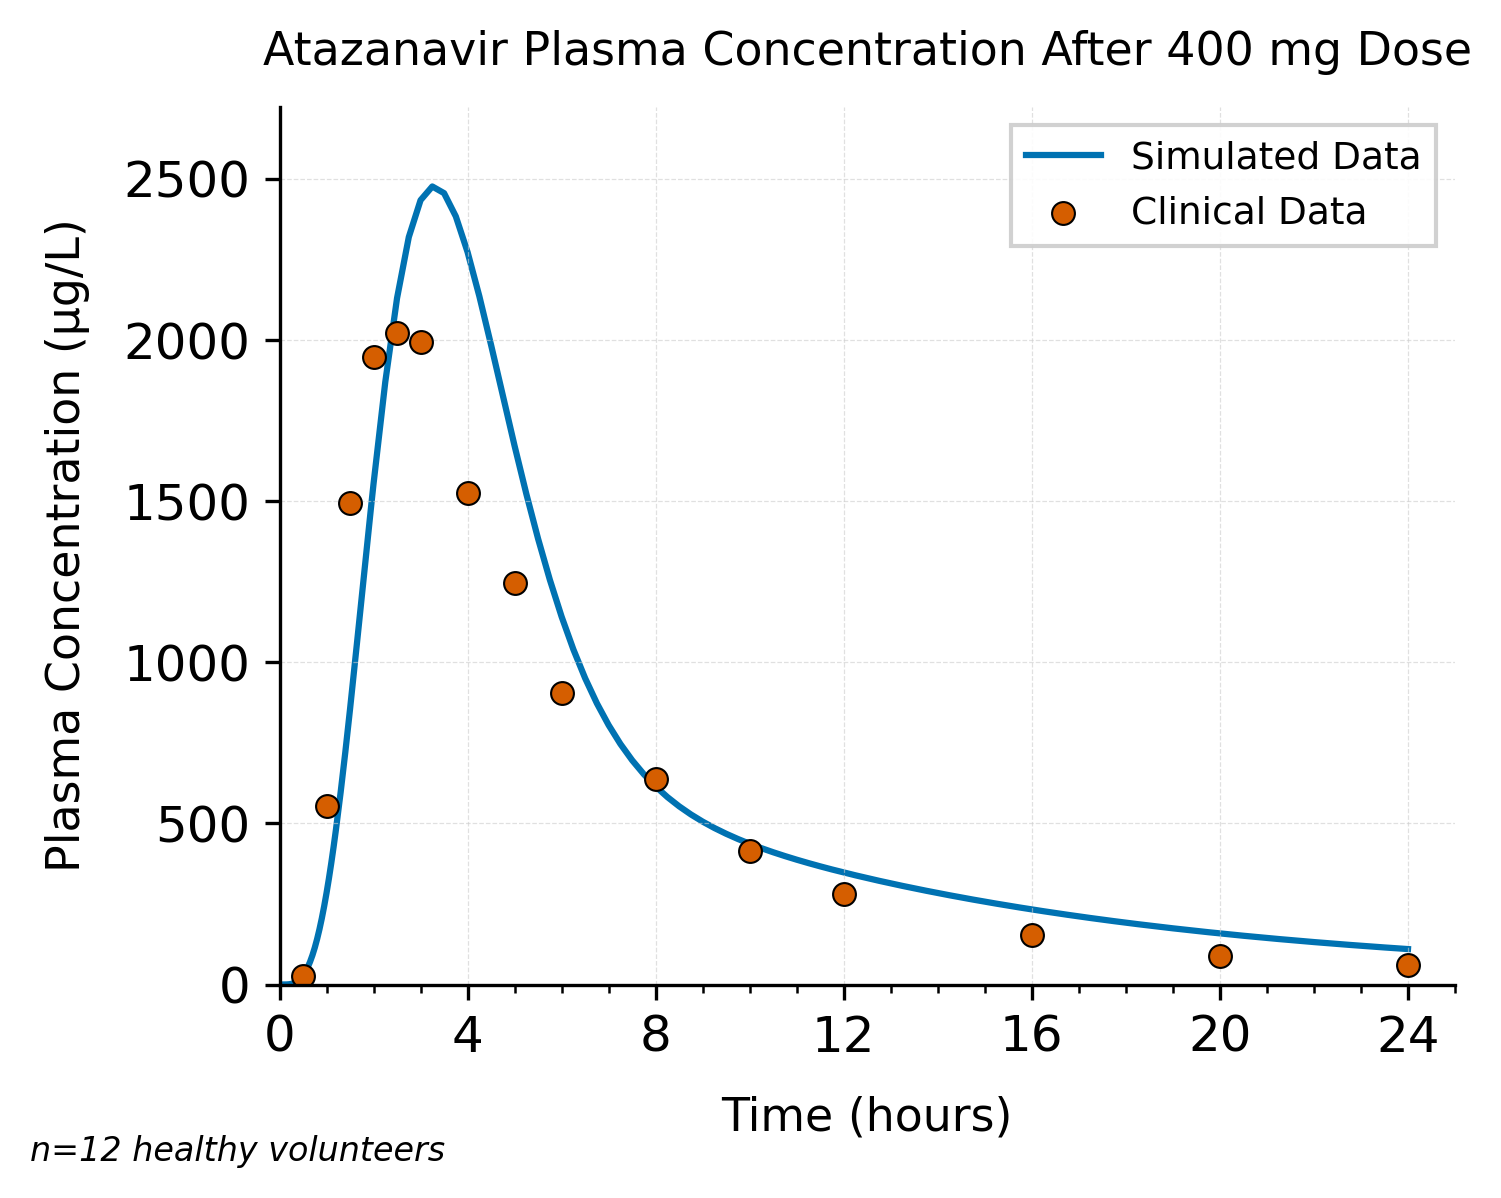

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# Use default fonts that Google Colab can process
plt.rcParams.update({
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 11,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

# Load the simulation results
sim_results = pd.read_csv("Atazanavir-Results.csv")

# Load the clinical data
clinical_data = pd.read_csv("Atazanavir Clinical Data.csv")

# Convert time from minutes to hours in the simulation data
sim_results["Time (hours)"] = sim_results["Time [min]"] / 60

# Convert plasma concentration from µmol/L to µg/L (Atazanavir has a molar mass of 705.84 g/mol)
sim_results["Plasma Concentration (µg/L)"] = (
    sim_results["Organism|VenousBlood|Plasma|Atazanavir|Concentration in container [µmol/l]"] * 705.84
)

# Create figure
fig, ax = plt.subplots(figsize=(5, 4))  # Cell-compatible size

# Create custom colors
sim_color = '#0072B2'  # Dark blue (colorblind-friendly)
clinical_color = '#D55E00'  # Vermillion (colorblind-friendly)

# Plot simulation results as a line
time_points = sim_results["Time (hours)"].values
concentrations = sim_results["Plasma Concentration (µg/L)"].values

# Plot the simulation line
ax.plot(
    time_points,
    concentrations,
    label="Simulated Data",
    color=sim_color,
    linewidth=1.5,
    zorder=1
)

# Plot clinical data as markers
clinical_times = clinical_data["Time [h]"]
clinical_conc = clinical_data["Avg [µg/l]"]

# Use scatter plot for clinical data
ax.scatter(
    clinical_times,
    clinical_conc,
    label="Clinical Data",
    color=clinical_color,
    s=30,  # Marker size
    marker='o',
    edgecolors='black',
    linewidth=0.5,
    zorder=2
)

# Add light grid for readability
ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.6, color='#CCCCCC')

# Set axis limits
ax.set_xlim(0, 25)
ax.set_ylim(0, max(concentrations.max(), clinical_conc.max()) * 1.1)

# Improve tick marks
ax.xaxis.set_major_locator(MultipleLocator(4))  # Major ticks every 4 hours
ax.xaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks every 1 hour
ax.yaxis.set_major_locator(MultipleLocator(500))  # Major y ticks every 500 µg/L

# Customize spine appearance
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels with proper formatting
ax.set_xlabel('Time (hours)', labelpad=8)
ax.set_ylabel('Plasma Concentration (µg/L)', labelpad=8)

# Create a clean, compact legend
legend = ax.legend(loc='upper right', frameon=True, framealpha=0.9,
                  edgecolor='#CCCCCC', fancybox=False)

# Add a cleaner, more specific title
ax.set_title('Atazanavir Plasma Concentration After 400 mg Dose',
            fontsize=11, pad=10)

# Add additional information about the source
fig.text(0.02, 0.02, 'n=12 healthy volunteers', fontsize=8, style='italic')

# Calculate RMSE
from scipy.interpolate import interp1d
f = interp1d(time_points, concentrations, kind='linear', bounds_error=False, fill_value='extrapolate')
sim_at_clinical_times = f(clinical_times)
rmse = np.sqrt(np.mean((sim_at_clinical_times - clinical_conc)**2))

# Ensure tight layout and save
plt.tight_layout()
plt.savefig('Atazanavir_PK_Comparison.png', dpi=600, bbox_inches='tight', transparent=False)
plt.savefig('Atazanavir_PK_Comparison.pdf', bbox_inches='tight')  # Vector format for publications

plt.show()

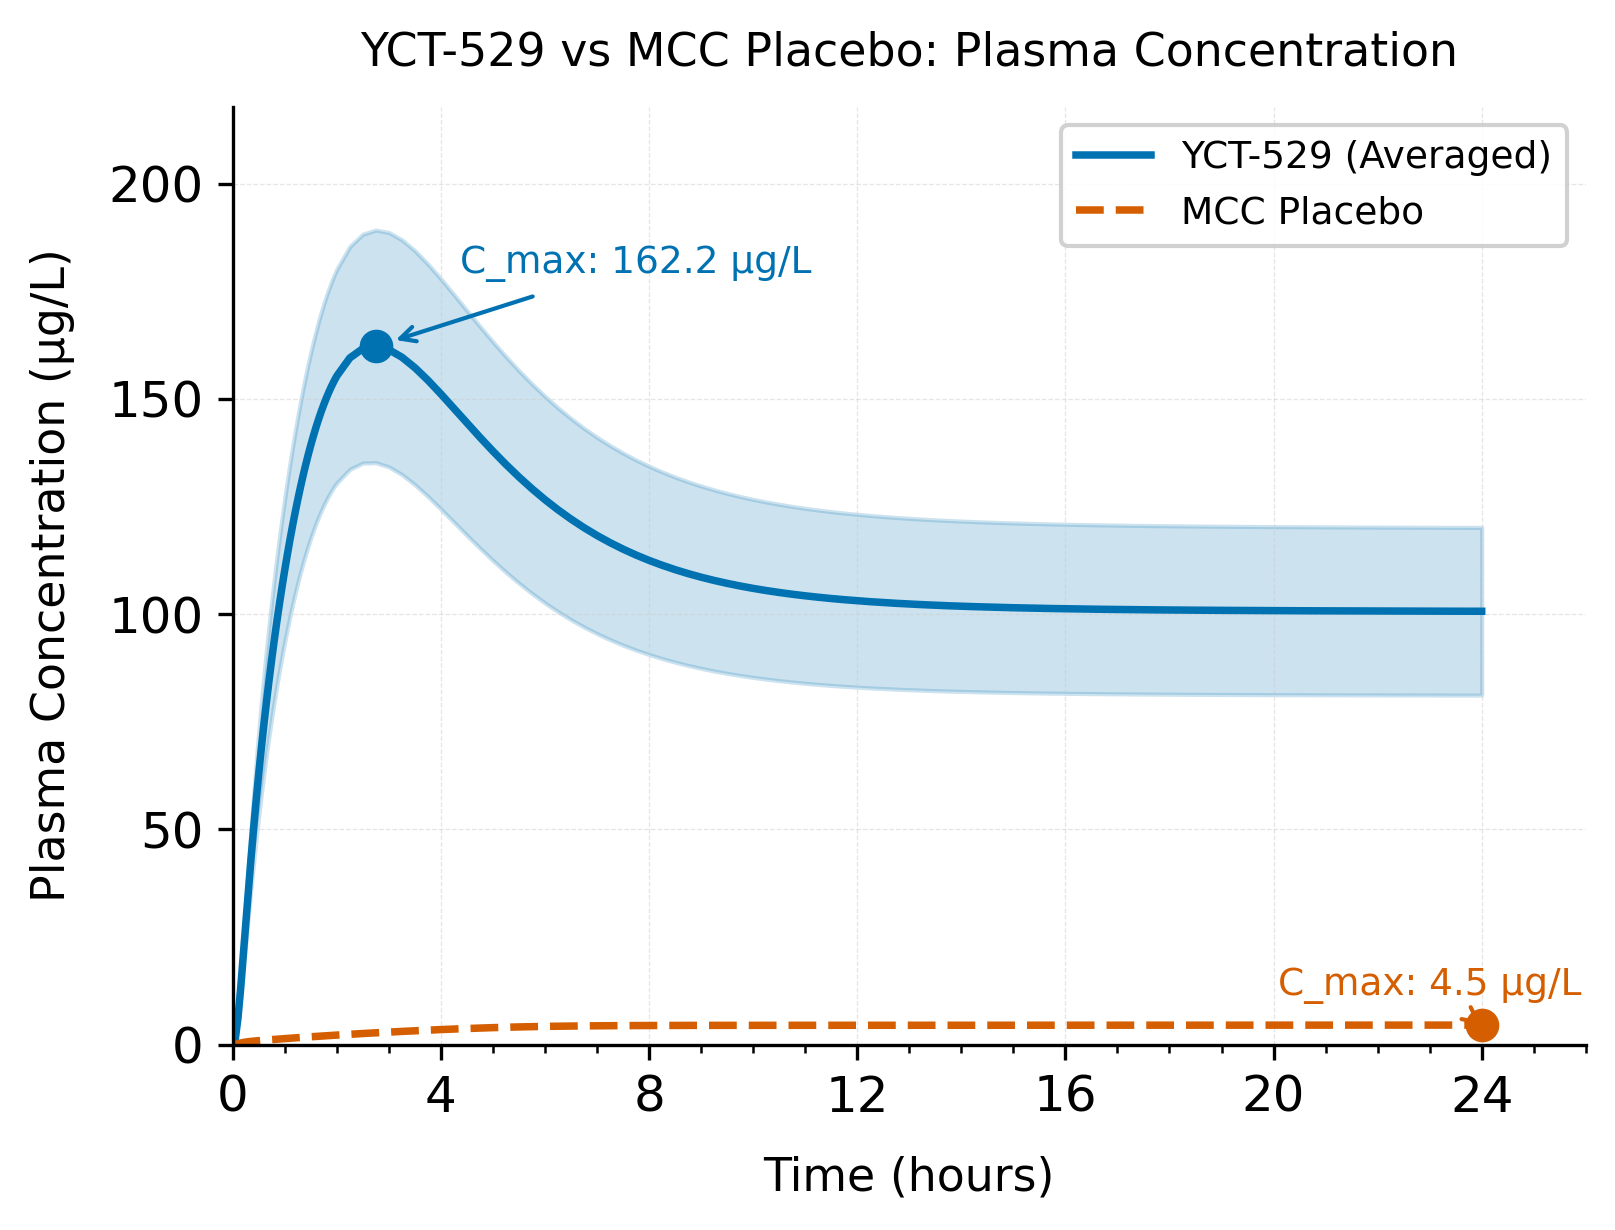

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Set publication-quality parameters
plt.rcParams.update({
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 11,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

# Define file paths
file_paths = {
    "Black American": "BAM Aggregated Sim Protocol-Results.csv",
    "White American": "WAM Aggregated Sim Protocol-Results.csv",
    "East Asian": "EastAsianMen Aggregated Sim Protocol-Results.csv",
    "European": "EuroMen Aggregated Sim Protocol-Results.csv",
    "MCC Placebo": "MCC Placebo Aggregated Sim Protocol-Results.csv"
}

# Initialize dictionaries to store data
race_data = {}
time_points = None

# Load and process each race's data
for race, file in file_paths.items():
    df = pd.read_csv(file)

    # Convert time from minutes to hours
    df["Time (hours)"] = df["Time [min]"] / 60

    # Extract venous plasma concentration
    plasma_col = "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"

    # Convert plasma concentration from µmol/L to µg/L (Molar mass of YCT-529 = 435.5 g/mol)
    df["Plasma Concentration (µg/L)"] = df[plasma_col] * 435.5

    # Get unique time points
    if time_points is None:
        time_points = df["Time (hours)"].unique()

    # Compute average for each time point
    avg_concentration = df.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()
    race_data[race] = avg_concentration

# Compute the average across all racial groups for YCT-529 (excluding MCC)
yct_529_mean = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).mean(axis=1)
yct_529_std = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).std(axis=1)

# Compute the MCC placebo directly by averaging its different dosages
df_mcc = pd.read_csv(file_paths["MCC Placebo"])
df_mcc["Time (hours)"] = df_mcc["Time [min]"] / 60
df_mcc["Plasma Concentration (µg/L)"] = df_mcc[plasma_col] * 435.5
mcc_mean = df_mcc.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()

# Identify C_max (peak values)
yct_529_cmax_time = yct_529_mean.idxmax()
yct_529_cmax_value = yct_529_mean.max()

mcc_cmax_time = mcc_mean.idxmax()
mcc_cmax_value = mcc_mean.max()

# Create the figure with better proportions
fig, ax = plt.subplots(figsize=(5.5, 4.2))

# Define colors with better contrast
yct_color = "#0072B2"  # Strong blue (colorblind-friendly)
mcc_color = "#D55E00"  # Vermillion (colorblind-friendly)

# Plot YCT-529 with standard deviation shading
ax.plot(time_points, yct_529_mean, label="YCT-529 (Averaged)",
        color=yct_color, linewidth=1.8)
ax.fill_between(time_points, yct_529_mean - yct_529_std, yct_529_mean + yct_529_std,
                color=yct_color, alpha=0.2)

# Plot MCC placebo
ax.plot(time_points, mcc_mean, label="MCC Placebo",
        color=mcc_color, linewidth=1.8, linestyle="--")

# Add C_max markers with improved positioning and formatting
ax.scatter(yct_529_cmax_time, yct_529_cmax_value,
           color=yct_color, marker="o", s=50, zorder=3)

ax.scatter(mcc_cmax_time, mcc_cmax_value,
           color=mcc_color, marker="o", s=50, zorder=3)

# Improve annotation positioning and style
ax.annotate(
    f"C_max: {yct_529_cmax_value:.1f} µg/L",
    xy=(yct_529_cmax_time, yct_529_cmax_value),
    xytext=(yct_529_cmax_time + 5, yct_529_cmax_value + 15),
    arrowprops=dict(arrowstyle="->", color=yct_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=yct_color, ha='center', va='bottom', zorder=4
)

ax.annotate(
    f"C_max: {mcc_cmax_value:.1f} µg/L",
    xy=(mcc_cmax_time, mcc_cmax_value),
    xytext=(mcc_cmax_time -1, mcc_cmax_value + 5),
    arrowprops=dict(arrowstyle="->", color=mcc_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=mcc_color, ha='center', va='bottom', zorder=4
)

# Add light grid for better readability
ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5, color='#CCCCCC')

# Improve axis settings
ax.set_xlim(0, 26)

# Add small buffer above highest point
y_max = max(yct_529_mean.max() + yct_529_std.max(), mcc_cmax_value) * 1.15
ax.set_ylim(0, y_max)

# Add proper tick spacing
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(50))

# Remove top and right spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels with clean formatting
ax.set_xlabel('Time (hours)', labelpad=8)
ax.set_ylabel('Plasma Concentration (µg/L)', labelpad=8)

# Add a more specific title
ax.set_title('YCT-529 vs MCC Placebo: Plasma Concentration', fontsize=11, pad=10)

# Create a clean legend with better positioning
legend = ax.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    edgecolor='#CCCCCC'
)


# Ensure tight layout
plt.tight_layout()

# Save the figure
plt.savefig('YCT529_vs_MCC_Comparison.png', dpi=600, bbox_inches='tight')
plt.savefig('YCT529_vs_MCC_Comparison.pdf', bbox_inches='tight')

plt.show()

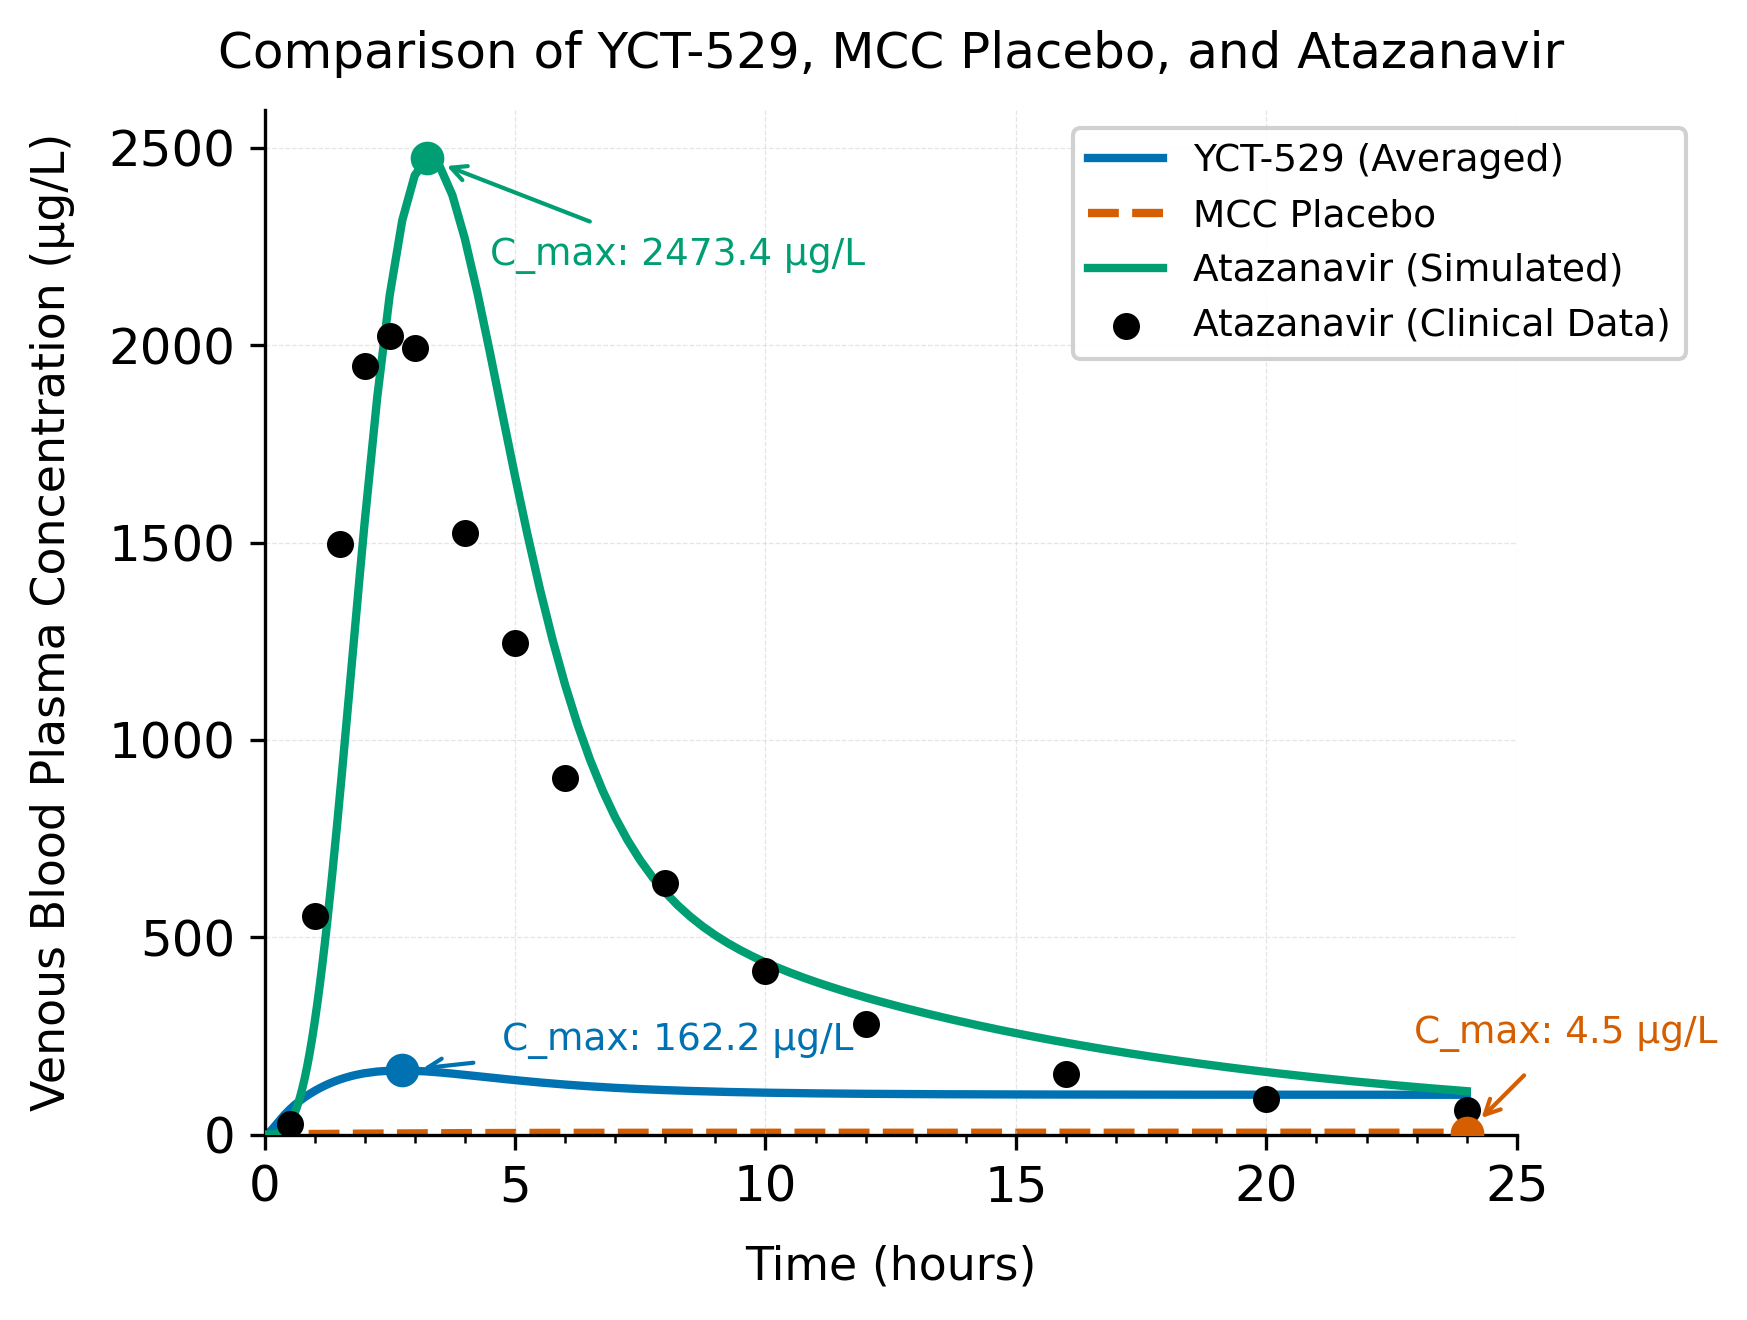

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Set publication-quality parameters
plt.rcParams.update({
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 11,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

# Define file paths
file_paths = {
    "Black American": "BAM Aggregated Sim Protocol-Results.csv",
    "White American": "WAM Aggregated Sim Protocol-Results.csv",
    "East Asian": "EastAsianMen Aggregated Sim Protocol-Results.csv",
    "European": "EuroMen Aggregated Sim Protocol-Results.csv",
    "MCC Placebo": "MCC Placebo Aggregated Sim Protocol-Results.csv"
}

atazanavir_sim_file = "Atazanavir-Results.csv"
atazanavir_clinical_file = "Atazanavir Clinical Data.csv"

# Molecular weights (needed for unit conversion)
MW_YCT_529 = 435.5  # g/mol
MW_Atazanavir = 704.9  # g/mol

# Initialize dictionaries to store data
race_data = {}
time_points = None

# Load and process each race's data
for race, file in file_paths.items():
    df = pd.read_csv(file)

    # Convert time from minutes to hours
    df["Time (hours)"] = df["Time [min]"] / 60

    # Extract venous plasma concentration and convert from µmol/L to µg/L
    plasma_col = "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"
    df["Plasma Concentration (µg/L)"] = df[plasma_col] * MW_YCT_529

    if time_points is None:
        time_points = df["Time (hours)"].unique()

    # Compute average for each time point
    avg_concentration = df.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()
    race_data[race] = avg_concentration

# Compute average across all racial groups for YCT-529 (excluding MCC)
yct_529_mean = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).mean(axis=1)
yct_529_std = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).std(axis=1)

# Compute MCC Placebo by averaging across its different dosages
df_mcc = pd.read_csv(file_paths["MCC Placebo"])
df_mcc["Time (hours)"] = df_mcc["Time [min]"] / 60
df_mcc["Plasma Concentration (µg/L)"] = df_mcc[plasma_col] * MW_YCT_529
mcc_mean = df_mcc.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()

# Identify C_max (peak values)
yct_529_cmax_time = yct_529_mean.idxmax()
yct_529_cmax_value = yct_529_mean.max()

mcc_cmax_time = mcc_mean.idxmax()
mcc_cmax_value = mcc_mean.max()

# Load Atazanavir simulation results
ataz_sim_df = pd.read_csv(atazanavir_sim_file)
ataz_sim_df["Time (hours)"] = ataz_sim_df["Time [min]"] / 60
plasma_col_ataz = "Organism|VenousBlood|Plasma|Atazanavir|Concentration in container [µmol/l]"
ataz_sim_df["Plasma Concentration (µg/L)"] = ataz_sim_df[plasma_col_ataz] * MW_Atazanavir

ataz_sim_mean = ataz_sim_df.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()
ataz_cmax_time = ataz_sim_mean.idxmax()
ataz_cmax_value = ataz_sim_mean.max()

# Load Atazanavir clinical data
ataz_clinical_df = pd.read_csv(atazanavir_clinical_file)
ataz_clinical_df.rename(columns={"Time [h]": "Time (hours)", "Avg [µg/l]": "Plasma Concentration (µg/L)"}, inplace=True)

# Create figure with better proportions
fig, ax = plt.subplots(figsize=(6, 4.5))

# Define colorblind-friendly colors
yct_color = "#0072B2"    # Blue
mcc_color = "#D55E00"    # Vermillion
ataz_color = "#009E73"   # Green
ataz_clin_color = "#000000"  # Black

# Plot YCT-529
ax.plot(time_points, yct_529_mean, label="YCT-529 (Averaged)",
        color=yct_color, linewidth=2, zorder=2)

# Plot MCC Placebo
ax.plot(time_points, mcc_mean, label="MCC Placebo",
        color=mcc_color, linewidth=2, linestyle="--", zorder=1)

# Plot Atazanavir simulation
ax.plot(ataz_sim_mean.index, ataz_sim_mean, label="Atazanavir (Simulated)",
        color=ataz_color, linewidth=2, zorder=3)

# Plot Atazanavir clinical data
ax.scatter(ataz_clinical_df["Time (hours)"], ataz_clinical_df["Plasma Concentration (µg/L)"],
           color=ataz_clin_color, marker="o", s=30, label="Atazanavir (Clinical Data)", zorder=4)

# Mark C_max values
ax.scatter(yct_529_cmax_time, yct_529_cmax_value, color=yct_color, marker="o", s=50, zorder=5)
ax.scatter(mcc_cmax_time, mcc_cmax_value, color=mcc_color, marker="o", s=50, zorder=5)
ax.scatter(ataz_cmax_time, ataz_cmax_value, color=ataz_color, marker="o", s=50, zorder=5)

# YCT-529 C_max annotation
ax.annotate(
    f"C_max: {yct_529_cmax_value:.1f} µg/L",
    xy=(yct_529_cmax_time, yct_529_cmax_value),
    xytext=(yct_529_cmax_time + 2, yct_529_cmax_value + 30),
    arrowprops=dict(arrowstyle="->", color=yct_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=yct_color, ha='left', va='bottom', zorder=6
)

# MCC Placebo C_max annotation
ax.annotate(
    f"C_max: {mcc_cmax_value:.1f} µg/L",
    xy=(mcc_cmax_time, mcc_cmax_value),
    xytext=(mcc_cmax_time + 5, mcc_cmax_value + 250),  # Positioned outside the graph area
    arrowprops=dict(arrowstyle="->", color=mcc_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=mcc_color, ha='right', va='center', zorder=6
)

# Atazanavir C_max annotation
ax.annotate(
    f"C_max: {ataz_cmax_value:.1f} µg/L",
    xy=(ataz_cmax_time, ataz_cmax_value),
    xytext=(ataz_cmax_time + 5, ataz_cmax_value - 200),  # Positioned right above the curve
    arrowprops=dict(arrowstyle="->", color=ataz_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=ataz_color, ha='center', va='top', zorder=6
)

# Add light grid
ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5, color='#CCCCCC')

# Configure axes
ax.set_xlim(0, 25)  # Explicitly set x-axis limit to 25 as requested
ax.set_ylim(0, ataz_cmax_value * 1.05)  # Give a little headroom above highest value

# Improve tick marks
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(500))

# Remove top and right spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels
ax.set_xlabel('Time (hours)', labelpad=8)
ax.set_ylabel('Venous Blood Plasma Concentration (µg/L)', labelpad=8)

# Add title
ax.set_title('Comparison of YCT-529, MCC Placebo, and Atazanavir', fontsize=12, pad=10)

# Create legend with better positioning
legend = ax.legend(
    loc='upper right',
    bbox_to_anchor=(1.15, 1),
    frameon=True,
    framealpha=0.9,
    edgecolor='#CCCCCC'
)

# Ensure tight layout
plt.tight_layout()

# Save the figure
plt.savefig('Drug_Comparison.png', dpi=600, bbox_inches='tight')
plt.savefig('Drug_Comparison.pdf', bbox_inches='tight')

plt.show()

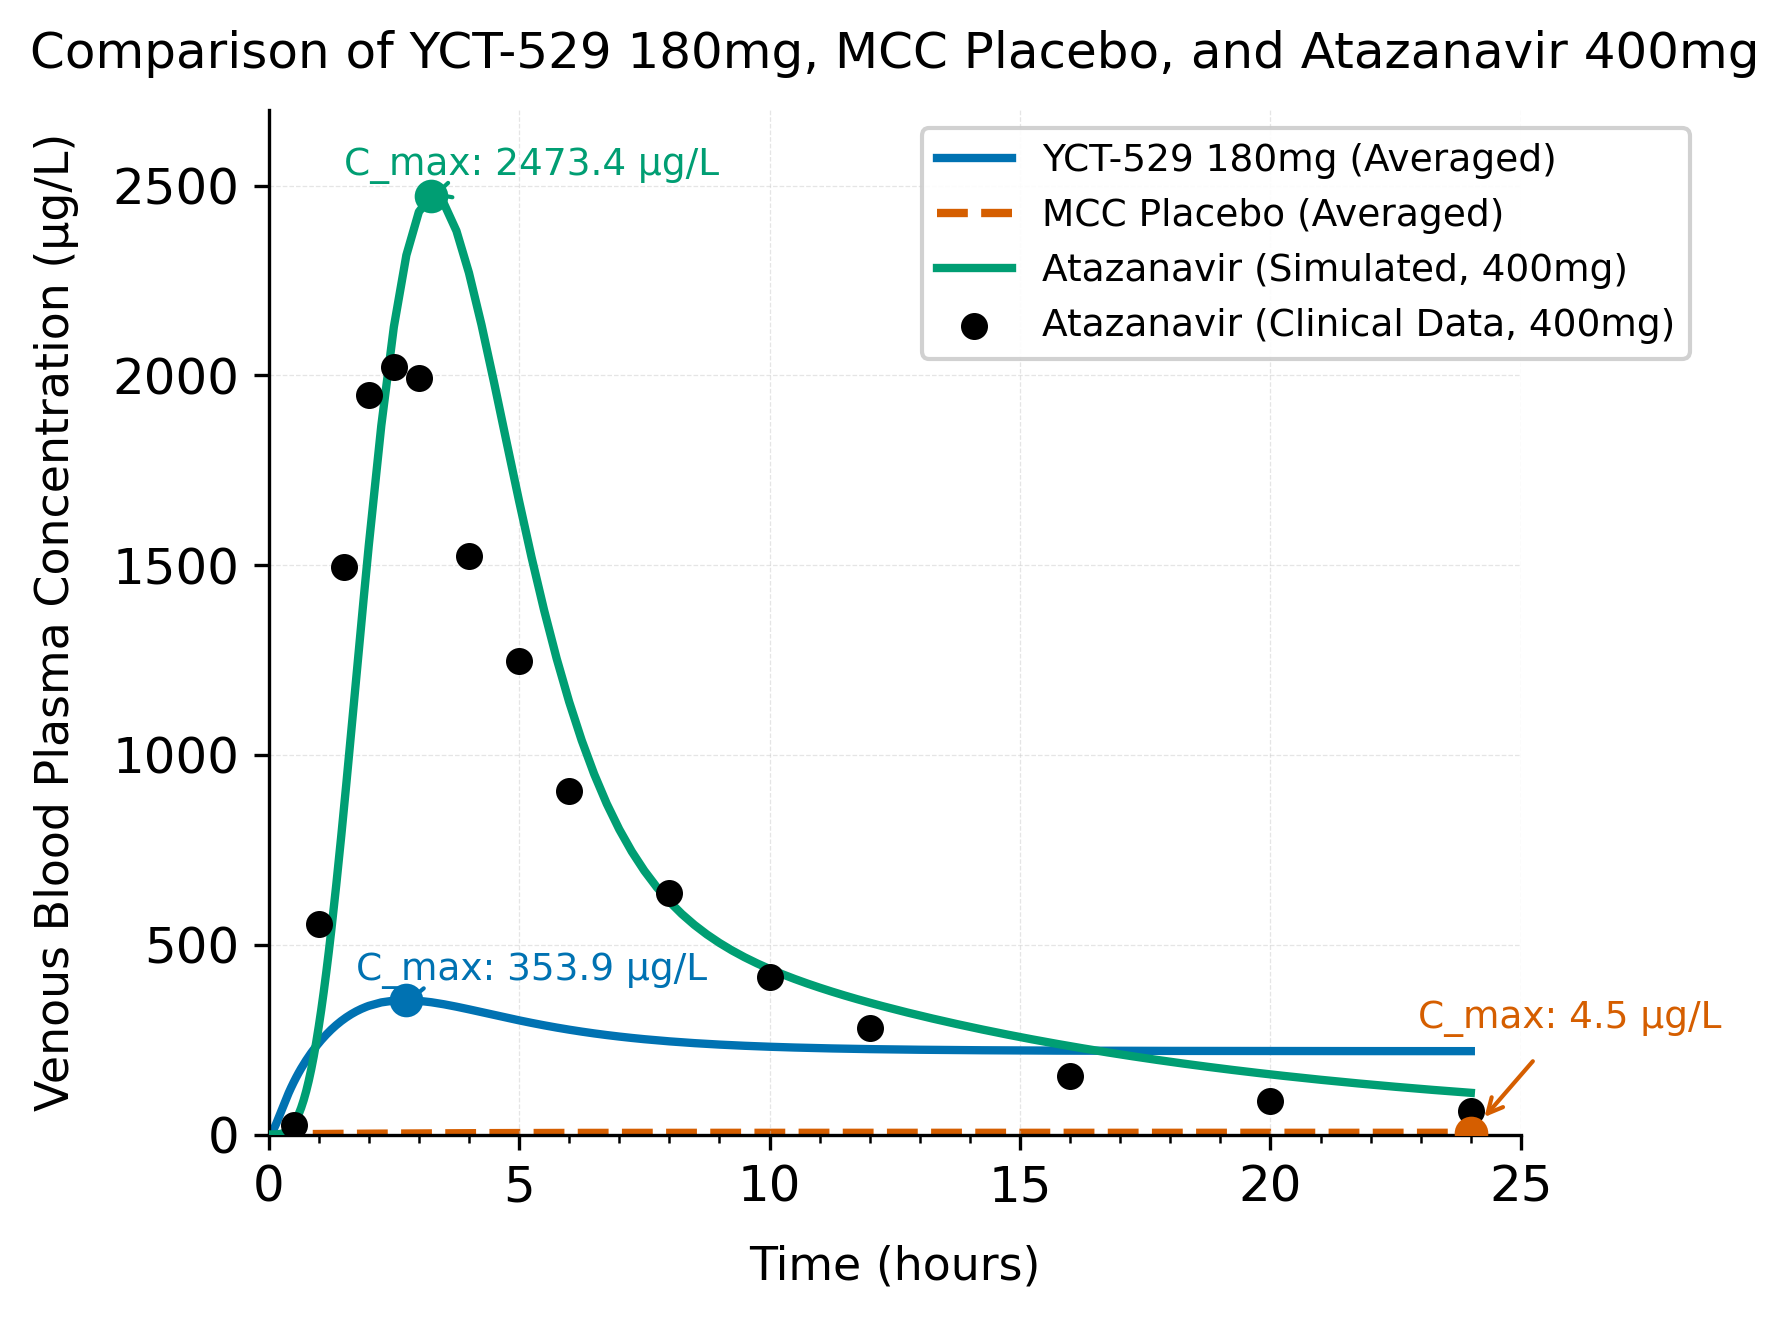

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Set publication-quality parameters
plt.rcParams.update({
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 11,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

# Define file paths
file_paths = {
    "Black American": {
        "results": "BAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "BAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "White American": {
        "results": "WAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "WAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "East Asian": {
        "results": "EastAsianMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EastAsianMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "European": {
        "results": "EuroMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EuroMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "MCC Placebo": {
        "results": "MCC Placebo Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "MCC Placebo Aggregated Sim Protocol-PK-Analyses.csv"
    }
}

# Molecular weights (needed for unit conversion)
MW_YCT_529 = 435.5  # g/mol
MW_Atazanavir = 704.9  # g/mol

# **Load and process YCT-529 (180mg) data for all races**
race_dfs = []
for race, paths in file_paths.items():
    if race != "MCC Placebo":  # Exclude MCC Placebo for now
        df = pd.read_csv(paths["results"])
        df = df[df["Dosage (mg)"] == 180]  # Filter for 180mg dose
        race_dfs.append(df)

# Concatenate all race data
all_race_180mg_df = pd.concat(race_dfs)

# Group by time and compute the mean and standard deviation
yct_529_180mg_avg = all_race_180mg_df.groupby("Time [min]")[
    "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"].agg(["mean", "std"]).reset_index()

# Convert to proper units (µmol/L to µg/L)
yct_529_180mg_avg["Time (hours)"] = yct_529_180mg_avg["Time [min]"] / 60
yct_529_180mg_avg["Mean Conc (µg/L)"] = yct_529_180mg_avg["mean"] * MW_YCT_529
yct_529_180mg_avg["Std Conc (µg/L)"] = yct_529_180mg_avg["std"] * MW_YCT_529

# **Compute MCC Placebo by averaging across its different dosages**
df_mcc = pd.read_csv(file_paths["MCC Placebo"]["results"])
df_mcc["Time (hours)"] = df_mcc["Time [min]"] / 60
df_mcc["Plasma Concentration (µg/L)"] = df_mcc[
    "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"] * MW_YCT_529
mcc_mean = df_mcc.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()

# Load Atazanavir Data
atazanavir_sim_file = "Atazanavir-Results.csv"
atazanavir_clinical_file = "Atazanavir Clinical Data.csv"

atazanavir_sim_df = pd.read_csv(atazanavir_sim_file)
atazanavir_clinical_df = pd.read_csv(atazanavir_clinical_file)

# Convert Atazanavir Simulated data
atazanavir_sim_df["Time (hours)"] = atazanavir_sim_df["Time [min]"] / 60
atazanavir_sim_df["Conc (µg/L)"] = atazanavir_sim_df[
    "Organism|VenousBlood|Plasma|Atazanavir|Concentration in container [µmol/l]"] * MW_Atazanavir

# Convert Atazanavir Clinical Data
atazanavir_clinical_df["Time (hours)"] = atazanavir_clinical_df["Time [h]"]
atazanavir_clinical_df["Conc (µg/L)"] = atazanavir_clinical_df["Avg [µg/l]"]

# **Identify C_max values**
yct_529_180mg_cmax_idx = yct_529_180mg_avg["Mean Conc (µg/L)"].idxmax()
yct_529_180mg_cmax_time = yct_529_180mg_avg.loc[yct_529_180mg_cmax_idx, "Time (hours)"]
yct_529_180mg_cmax = yct_529_180mg_avg.loc[yct_529_180mg_cmax_idx, "Mean Conc (µg/L)"]

mcc_cmax_time = mcc_mean.idxmax()
mcc_cmax_value = mcc_mean.max()

atazanavir_sim_cmax_idx = atazanavir_sim_df["Conc (µg/L)"].idxmax()
atazanavir_sim_cmax_time = atazanavir_sim_df.loc[atazanavir_sim_cmax_idx, "Time (hours)"]
atazanavir_sim_cmax = atazanavir_sim_df.loc[atazanavir_sim_cmax_idx, "Conc (µg/L)"]

# Create figure with improved proportions
fig, ax = plt.subplots(figsize=(6, 4.5))

# Define colorblind-friendly colors
yct_color = "#0072B2"    # Blue
mcc_color = "#D55E00"    # Vermillion
ataz_color = "#009E73"   # Green
ataz_clin_color = "#000000"  # Black

# Plot YCT-529 180mg (Averaged)
ax.plot(yct_529_180mg_avg["Time (hours)"], yct_529_180mg_avg["Mean Conc (µg/L)"],
        color=yct_color, linewidth=2, label="YCT-529 180mg (Averaged)", zorder=2)

# Plot MCC Placebo (Averaged across all dosages)
ax.plot(mcc_mean.index, mcc_mean,
        color=mcc_color, linestyle="--", linewidth=2, label="MCC Placebo (Averaged)", zorder=1)

# Plot Atazanavir Simulated (400mg)
ax.plot(atazanavir_sim_df["Time (hours)"], atazanavir_sim_df["Conc (µg/L)"],
        color=ataz_color, linewidth=2, label="Atazanavir (Simulated, 400mg)", zorder=3)

# Plot Atazanavir Clinical Data (400mg)
ax.scatter(atazanavir_clinical_df["Time (hours)"], atazanavir_clinical_df["Conc (µg/L)"],
           color=ataz_clin_color, marker="o", s=30, label="Atazanavir (Clinical Data, 400mg)", zorder=4)

# Mark C_max values
ax.scatter(yct_529_180mg_cmax_time, yct_529_180mg_cmax, color=yct_color, marker="o", s=50, zorder=5)
ax.scatter(mcc_cmax_time, mcc_cmax_value, color=mcc_color, marker="o", s=50, zorder=5)
ax.scatter(atazanavir_sim_cmax_time, atazanavir_sim_cmax, color=ataz_color, marker="o", s=50, zorder=5)

# Annotate C_max values with improved positioning based on your changes
# YCT-529 C_max annotation
ax.annotate(
    f"C_max: {yct_529_180mg_cmax:.1f} µg/L",
    xy=(yct_529_180mg_cmax_time, yct_529_180mg_cmax),
    xytext=(yct_529_180mg_cmax_time + 6, yct_529_180mg_cmax + 30),
    arrowprops=dict(arrowstyle="->", color=yct_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=yct_color, ha='right', va='bottom', zorder=6
)

# MCC Placebo C_max annotation - positioned at far right
ax.annotate(
    f"C_max: {mcc_cmax_value:.1f} µg/L",
    xy=(mcc_cmax_time, mcc_cmax_value),
    xytext=(mcc_cmax_time + 5, mcc_cmax_value + 300),  # Positioned at far right outside graph
    arrowprops=dict(arrowstyle="->", color=mcc_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=mcc_color, ha='right', va='center', zorder=6
)

# Atazanavir C_max annotation - moved to top of graph
ax.annotate(
    f"C_max: {atazanavir_sim_cmax:.1f} µg/L",
    xy=(atazanavir_sim_cmax_time, atazanavir_sim_cmax),
    xytext=(atazanavir_sim_cmax_time + 2, 2600),  # Positioned at top of graph
    arrowprops=dict(arrowstyle="->", color=ataz_color, shrinkA=5, shrinkB=5, lw=1),
    fontsize=9, color=ataz_color, ha='center', va='top', zorder=6
)

# Add light grid
ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5, color='#CCCCCC')

# Configure axes
ax.set_xlim(0, 25)  # Explicitly set x-axis limit to 25
ax.set_ylim(0, 2700)  # Set y-axis limit with enough room for annotation

# Improve tick marks
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(500))

# Remove top and right spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add labels
ax.set_xlabel('Time (hours)', labelpad=8)
ax.set_ylabel('Venous Blood Plasma Concentration (µg/L)', labelpad=8)

# Add title with dose information
ax.set_title('Comparison of YCT-529 180mg, MCC Placebo, and Atazanavir 400mg',
             fontsize=12, pad=10)

# Create legend with better positioning - shifted more to the right
legend = ax.legend(
    loc='upper right',
    bbox_to_anchor=(1.15, 1),  # This shifts the legend to the right
    frameon=True,
    framealpha=0.9,
    edgecolor='#CCCCCC'
)

# Ensure tight layout
plt.tight_layout()

# Save the figure
plt.savefig('YCT529_180mg_Atazanavir_400mg_Comparison.png', dpi=600, bbox_inches='tight')
plt.savefig('YCT529_180mg_Atazanavir_400mg_Comparison.pdf', bbox_inches='tight')

plt.show()

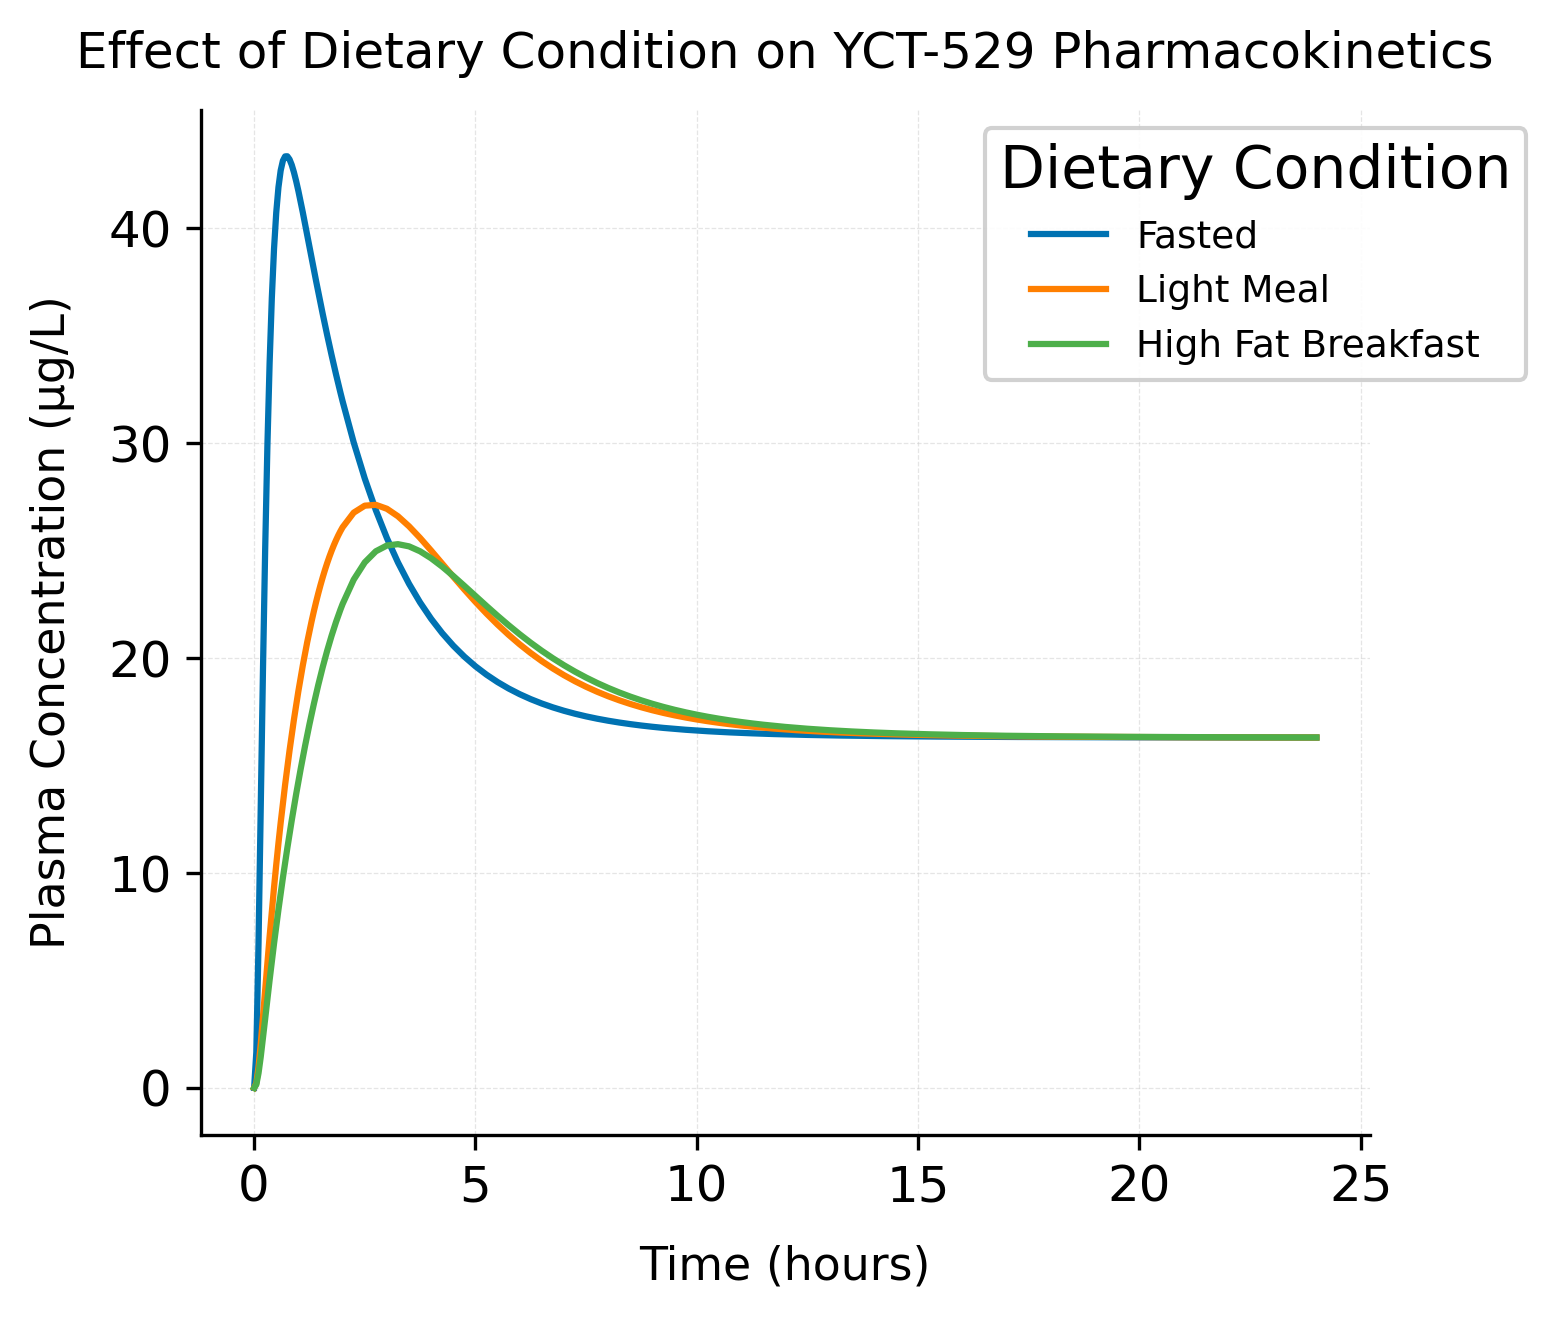

<ipython-input-10-aad3376bb55e>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Dietary Condition", y="Plasma Concentration (µg/L)",


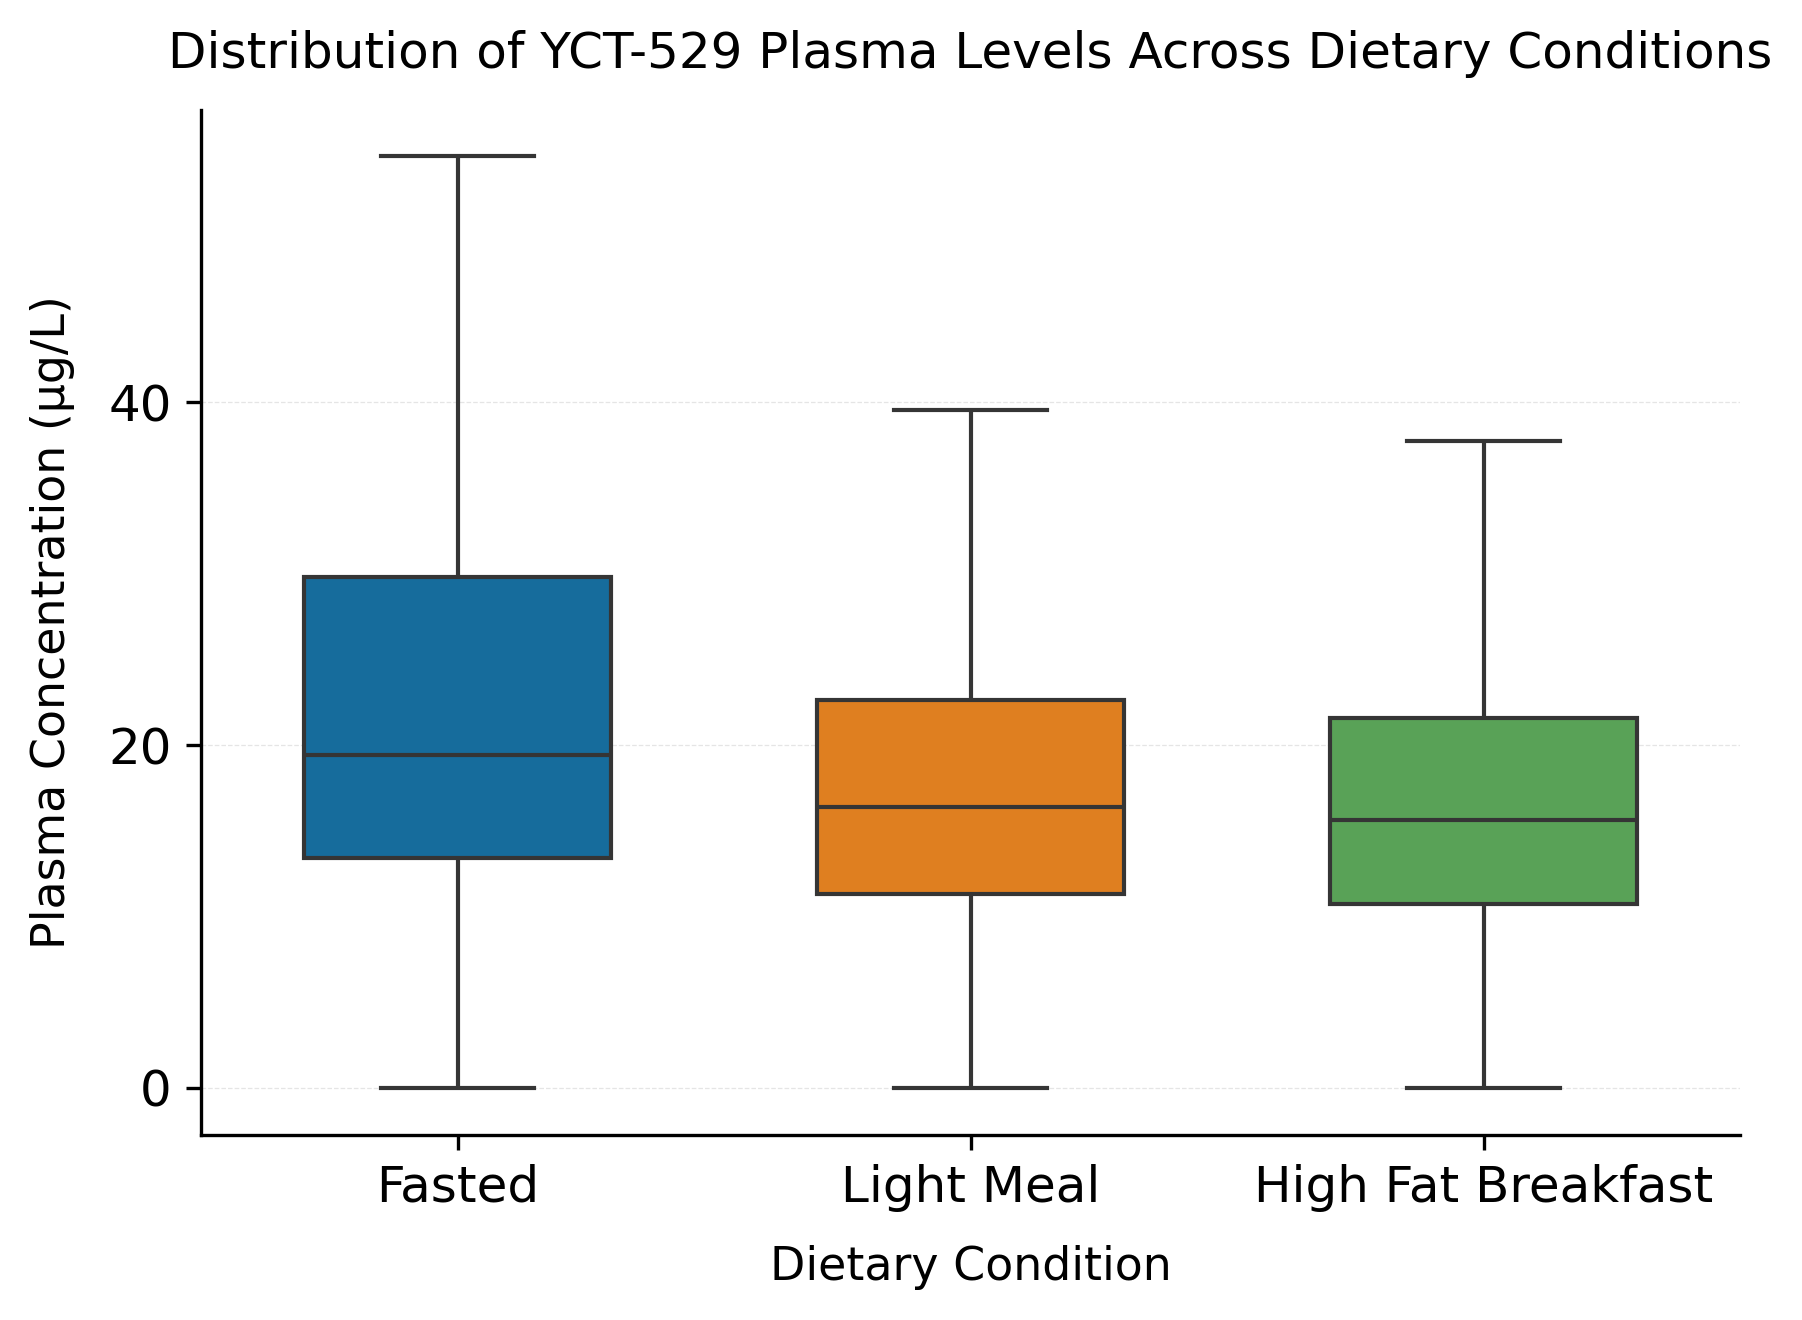

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Set publication-quality parameters
plt.rcParams.update({
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 11,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

# Load data
file_path = "Meal State Aggregated Results.csv"
df = pd.read_csv(file_path)

# Convert time to hours for clarity
df["Time [h]"] = df["Time [min]"] / 60

# Rename column for clarity
df.rename(columns={"Meal": "Dietary Condition"}, inplace=True)

# Convert concentration to µg/L
df["Plasma Concentration (µg/L)"] = df["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"] * 435.5  # Using YCT-529 molecular weight

# Define colorblind-friendly colors for dietary conditions
colors = {
    "Fasted": "#0072B2",        # Blue
    "Light Meal": "#ff7f00",    # Orange
    "High Fat Breakfast": "#4daf4a"  # Green
}

# -------- LINE PLOT: Time vs. Plasma Concentration --------
fig, ax = plt.subplots(figsize=(6, 4.5))

# Use seaborn's lineplot exactly as in the original code
sns.lineplot(data=df, x="Time [h]", y="Plasma Concentration (µg/L)",
             hue="Dietary Condition", palette=colors, errorbar=None, ax=ax)

# Customizations with consistent styling
ax.set_xlabel("Time (hours)", labelpad=8)
ax.set_ylabel("Plasma Concentration (µg/L)", labelpad=8)
ax.set_title("Effect of Dietary Condition on YCT-529 Pharmacokinetics",
             fontsize=12, pad=10)

# Remove top and right spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add light grid for better readability
ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5, color='#CCCCCC')

# Create legend with better positioning
legend = ax.legend(
    title="Dietary Condition",
    loc='upper right',
    bbox_to_anchor=(1.15, 1),
    frameon=True,
    framealpha=0.9,
    edgecolor='#CCCCCC'
)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('YCT529_Dietary_Effect_Line.png', dpi=600, bbox_inches='tight')
plt.savefig('YCT529_Dietary_Effect_Line.pdf', bbox_inches='tight')
plt.show()


# -------- BOX PLOT: Plasma Concentration Distributions --------
fig, ax = plt.subplots(figsize=(6, 4.5))

# Custom boxplot with consistent styling
sns.boxplot(data=df, x="Dietary Condition", y="Plasma Concentration (µg/L)",
            palette=colors, ax=ax, showfliers=False, width=0.6)

# Add light grid for better readability (y-axis only)
ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5, color='#CCCCCC', axis='y')

# Remove top and right spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Customizations
ax.set_xlabel("Dietary Condition", labelpad=8)
ax.set_ylabel("Plasma Concentration (µg/L)", labelpad=8)
ax.set_title("Distribution of YCT-529 Plasma Levels Across Dietary Conditions",
             fontsize=12, pad=10)

# Set y-axis ticks at consistent intervals
ax.yaxis.set_major_locator(MultipleLocator(20))

plt.tight_layout()
plt.savefig('YCT529_Dietary_Distribution_Box.png', dpi=600, bbox_inches='tight')
plt.savefig('YCT529_Dietary_Distribution_Box.pdf', bbox_inches='tight')
plt.show()


=== STATISTICAL SIGNIFICANCE ANALYSIS ===
One-way ANOVA for C_max across dietary conditions:
F-statistic: 793.4452
p-value: 0.0000
Statistically significant: True

Tukey's HSD Post-hoc Test:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------------------
            Fasted High Fat Breakfast -17.5324   0.0 -18.6552 -16.4096   True
            Fasted         Light Meal -15.2727   0.0 -16.3955 -14.1499   True
High Fat Breakfast         Light Meal   2.2597   0.0   1.1369   3.3825   True
-----------------------------------------------------------------------------

=== PRACTICAL SIGNIFICANCE ANALYSIS ===
Mean C_max values:
Fasted: 45.85 µg/L
Light Meal: 30.58 µg/L
High Fat Breakfast: 28.32 µg/L

Cohen's d Effect Sizes:
Fasted vs. Light Meal: 1.38
Fasted vs. High Fat Breakfast: 1.61
Light Meal vs. High Fat Breakfast: 0.22


<ipython-input-23-1b91547422b3>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dietary Condition", y="Plasma Concentration (µg/L)",


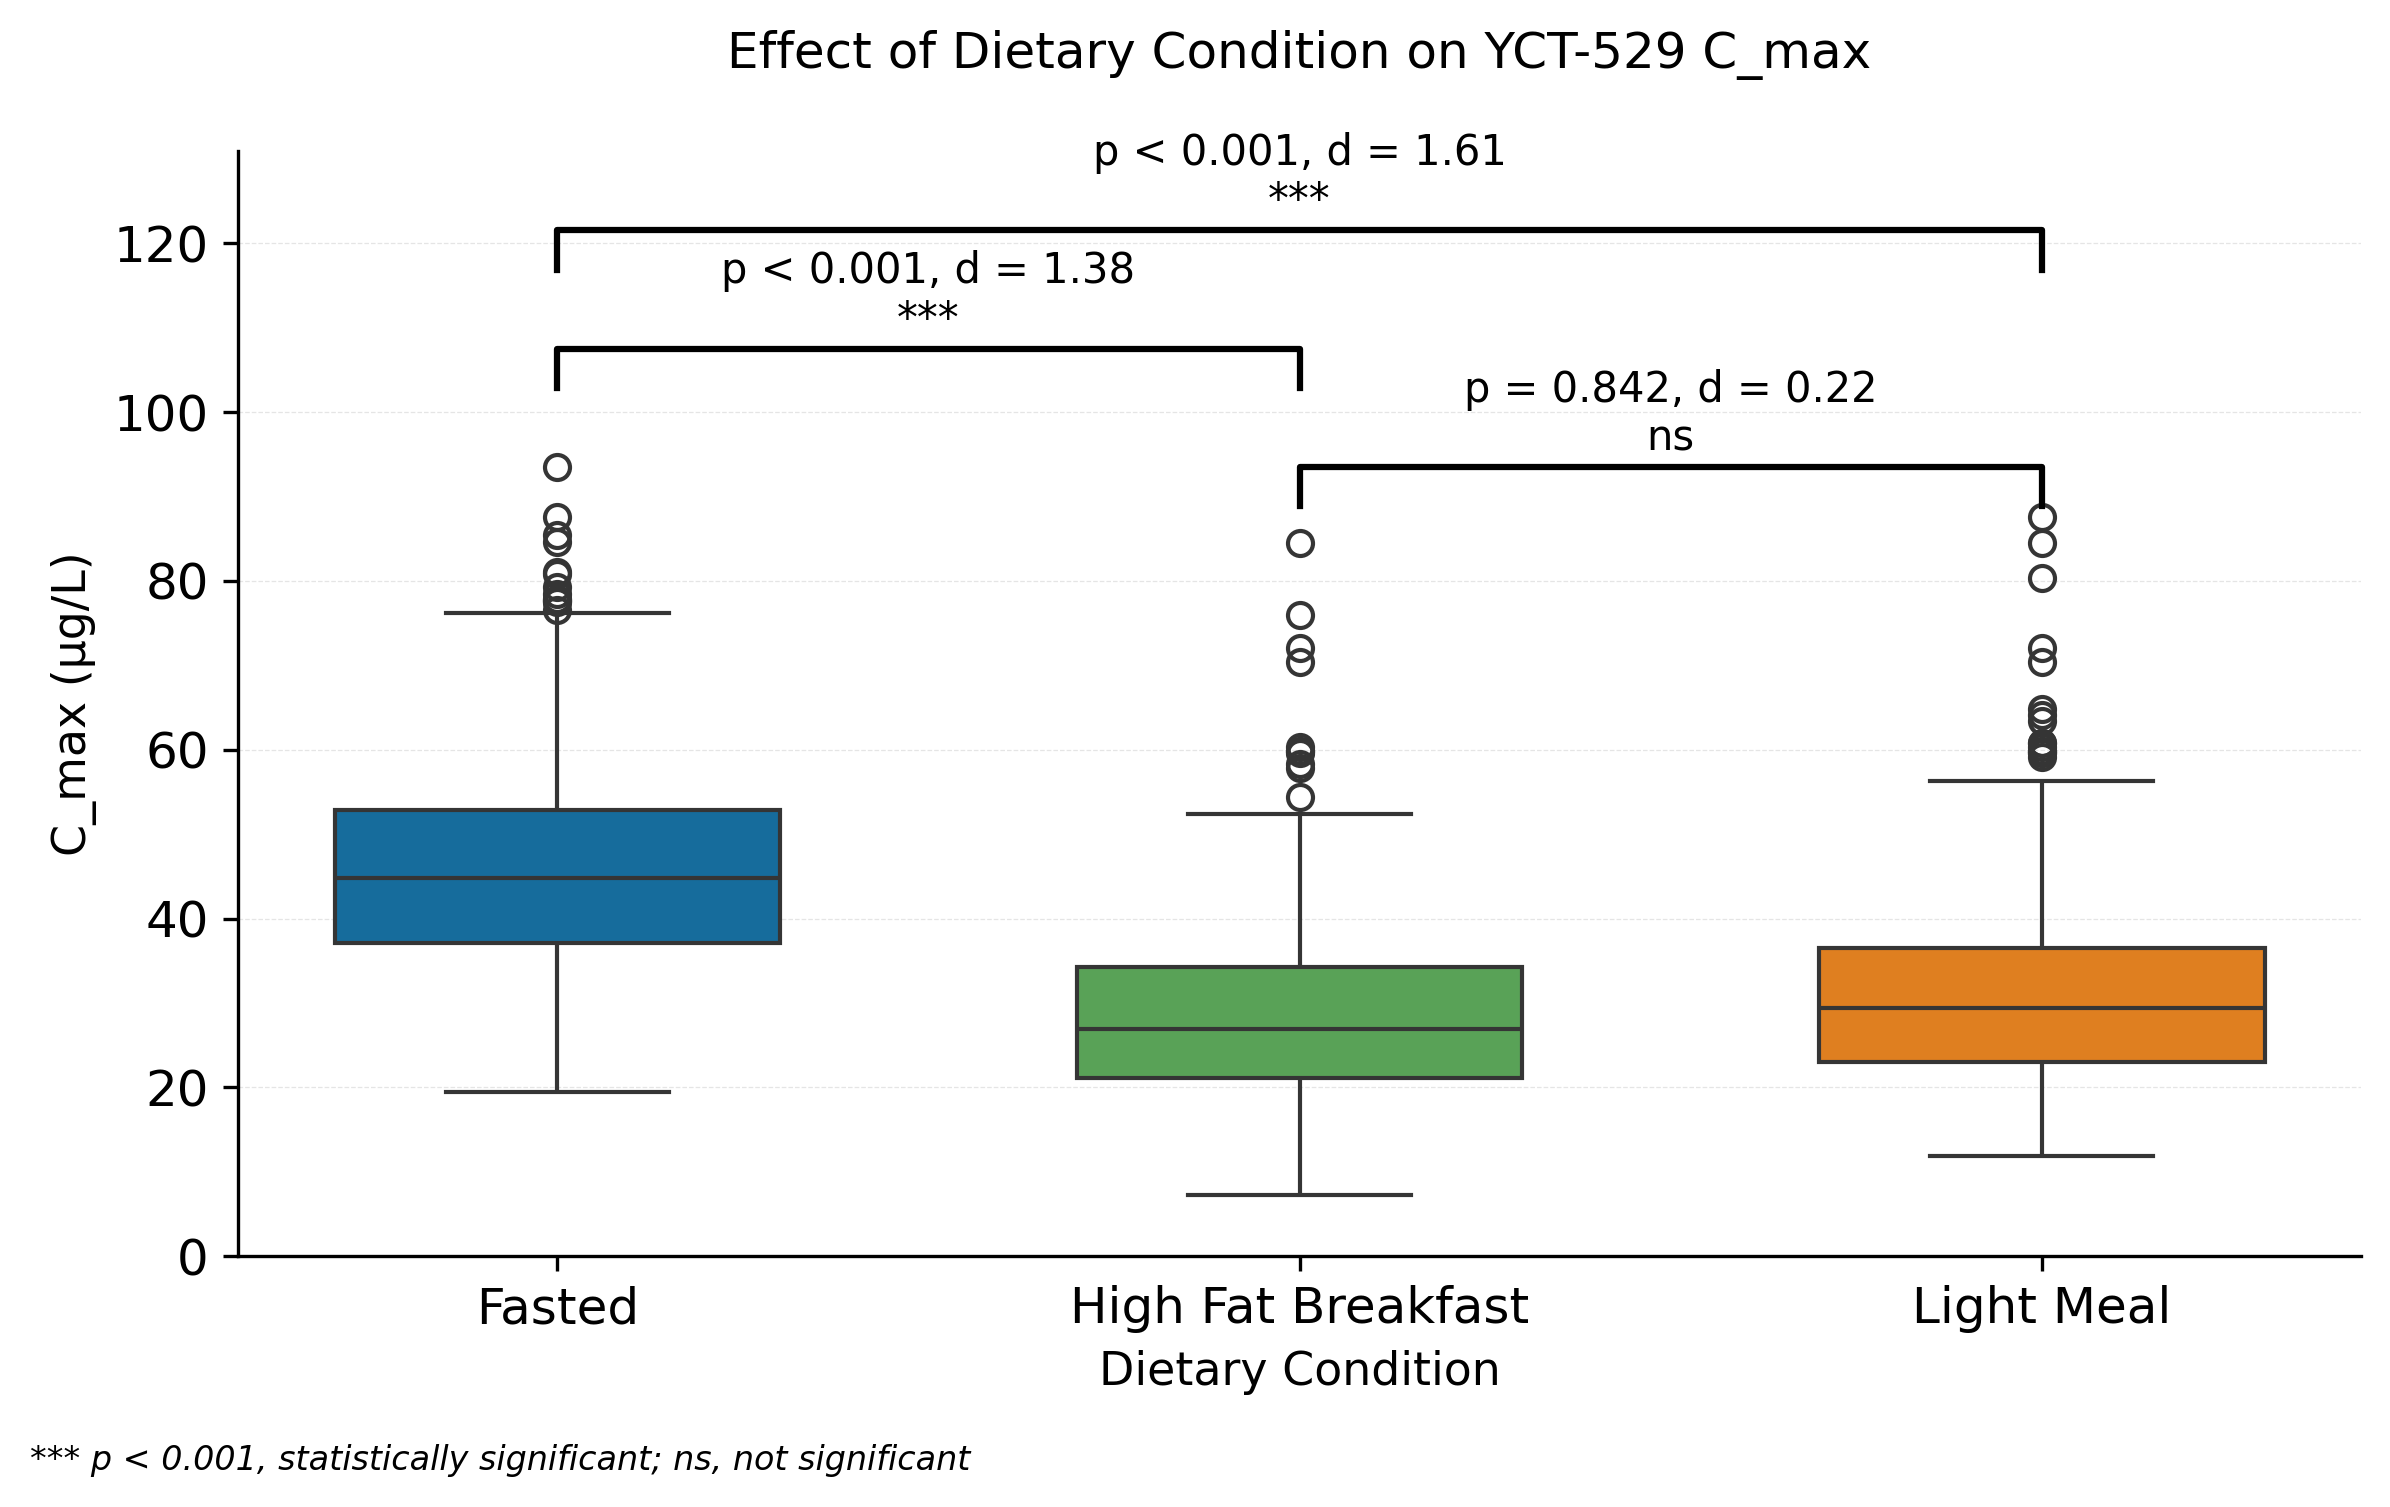


=== SUMMARY FOR PAPER ===
The effect of dietary conditions on YCT-529 C_max was both statistically
significant (ANOVA: F=793.45, p<0.001) and practically meaningful.
Fasting resulted in 61.9% higher C_max than high-fat meals,
representing a large effect (Cohen's d=1.61).
These findings suggest dietary intake significantly influences YCT-529 absorption,
with potential implications for dosing strategies and administration guidelines.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.ticker import MultipleLocator

# Set publication-quality parameters (consistent with your existing code)
plt.rcParams.update({
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 11,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

# Load data
file_path = "Meal State Aggregated Results.csv"
df = pd.read_csv(file_path)

# Convert time to hours and concentration to µg/L (consistent with your code)
df["Time [h]"] = df["Time [min]"] / 60
df.rename(columns={"Meal": "Dietary Condition"}, inplace=True)
df["Plasma Concentration (µg/L)"] = df["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"] * 435.5

# Define colorblind-friendly colors (maintained from your code)
colors = {
    "Fasted": "#0072B2",        # Blue
    "Light Meal": "#ff7f00",    # Orange
    "High Fat Breakfast": "#4daf4a"  # Green
}

# ==== STATISTICAL SIGNIFICANCE TESTS ====

# 1. Extract C_max values for each dietary condition
# Group by individual and dietary condition, find maximum concentration for each
c_max_df = df.groupby(['IndividualId', 'Dietary Condition'])['Plasma Concentration (µg/L)'].max().reset_index()

# Get arrays for each condition
fasted_cmax = c_max_df[c_max_df['Dietary Condition'] == 'Fasted']['Plasma Concentration (µg/L)']
light_meal_cmax = c_max_df[c_max_df['Dietary Condition'] == 'Light Meal']['Plasma Concentration (µg/L)']
high_fat_cmax = c_max_df[c_max_df['Dietary Condition'] == 'High Fat Breakfast']['Plasma Concentration (µg/L)']

# 2. One-way ANOVA for C_max
print("\n=== STATISTICAL SIGNIFICANCE ANALYSIS ===")
print("One-way ANOVA for C_max across dietary conditions:")
f_stat, p_value = stats.f_oneway(fasted_cmax, light_meal_cmax, high_fat_cmax)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant: {p_value < 0.05}")

# 3. Post-hoc Tukey's HSD test if ANOVA is significant
if p_value < 0.05:
    print("\nTukey's HSD Post-hoc Test:")
    all_data = np.concatenate([fasted_cmax, light_meal_cmax, high_fat_cmax])
    groups = np.concatenate([
        ['Fasted'] * len(fasted_cmax),
        ['Light Meal'] * len(light_meal_cmax),
        ['High Fat Breakfast'] * len(high_fat_cmax)
    ])

    tukey_results = pairwise_tukeyhsd(all_data, groups, alpha=0.05)
    print(tukey_results)

# ==== PRACTICAL SIGNIFICANCE TESTS ====

print("\n=== PRACTICAL SIGNIFICANCE ANALYSIS ===")

# 1. Calculate mean values
fasted_mean = np.mean(fasted_cmax)
light_meal_mean = np.mean(light_meal_cmax)
high_fat_mean = np.mean(high_fat_cmax)

print("Mean C_max values:")
print(f"Fasted: {fasted_mean:.2f} µg/L")
print(f"Light Meal: {light_meal_mean:.2f} µg/L")
print(f"High Fat Breakfast: {high_fat_mean:.2f} µg/L")

# 2. Calculate Cohen's d effect sizes
def cohens_d(group1, group2):
    """Calculate Cohen's d effect size between two groups."""
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt(((len(group1) - 1) * np.var(group1) +
                         (len(group2) - 1) * np.var(group2)) /
                        (len(group1) + len(group2) - 2))
    return mean_diff / pooled_std

# Calculate effect sizes
d_fasted_vs_light = cohens_d(fasted_cmax, light_meal_cmax)
d_fasted_vs_high = cohens_d(fasted_cmax, high_fat_cmax)
d_light_vs_high = cohens_d(light_meal_cmax, high_fat_cmax)

print("\nCohen's d Effect Sizes:")
print(f"Fasted vs. Light Meal: {d_fasted_vs_light:.2f}")
print(f"Fasted vs. High Fat Breakfast: {d_fasted_vs_high:.2f}")
print(f"Light Meal vs. High Fat Breakfast: {d_light_vs_high:.2f}")

# Interpret effect sizes
def interpret_cohens_d(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "negligible effect"
    elif abs_d < 0.5:
        return "small effect"
    elif abs_d < 0.8:
        return "medium effect"
    else:
        return "large effect"

print("\nEffect Size Interpretations:")
print(f"Fasted vs. Light Meal: {interpret_cohens_d(d_fasted_vs_light)}")
print(f"Fasted vs. High Fat Breakfast: {interpret_cohens_d(d_fasted_vs_high)}")
print(f"Light Meal vs. High Fat Breakfast: {interpret_cohens_d(d_light_vs_high)}")

# 3. Calculate percent differences
pct_diff_fasted_light = 100 * (fasted_mean - light_meal_mean) / light_meal_mean
pct_diff_fasted_high = 100 * (fasted_mean - high_fat_mean) / high_fat_mean
pct_diff_light_high = 100 * (light_meal_mean - high_fat_mean) / high_fat_mean

print("\nPercent Differences in C_max:")
print(f"Fasted is {pct_diff_fasted_light:.1f}% different from Light Meal")
print(f"Fasted is {pct_diff_fasted_high:.1f}% different from High Fat Breakfast")
print(f"Light Meal is {pct_diff_light_high:.1f}% different from High Fat Breakfast")

# ==== VISUALIZATION WITH STATISTICAL & PRACTICAL SIGNIFICANCE ====

# Create an enhanced boxplot showing both statistical significance and Cohen's d
fig, ax = plt.subplots(figsize=(8, 5))

# Create the boxplot
sns.boxplot(x="Dietary Condition", y="Plasma Concentration (µg/L)",
            data=c_max_df, palette=colors, ax=ax, width=0.6)

# Add statistical significance annotations with star notation
y_max = max(fasted_cmax.max(), light_meal_cmax.max(), high_fat_cmax.max())

# Reposition annotations - place the overarching one on top
# Fasted vs Light Meal (overarching - place at the top)
x1, x2 = 0, 2  # Fasted vs Light Meal
y_pos = y_max * 1.25
plt.plot([x1, x1, x2, x2], [y_pos, y_pos + y_max*0.05, y_pos + y_max*0.05, y_pos], color='black', lw=1.5)
plt.text((x1+x2)/2, y_pos + y_max*0.06, f"p < 0.001, d = 1.61\n***", ha='center', va='bottom')

# Fasted vs High Fat (place below the overarching one)
x1, x2 = 0, 1  # Fasted vs High Fat
y_pos = y_max * 1.1
plt.plot([x1, x1, x2, x2], [y_pos, y_pos + y_max*0.05, y_pos + y_max*0.05, y_pos], color='black', lw=1.5)
plt.text((x1+x2)/2, y_pos + y_max*0.06, f"p < 0.001, d = 1.38\n***", ha='center', va='bottom')

# Add Light Meal vs High Fat annotation
x1, x2 = 1, 2  # High Fat vs Light Meal
y_pos = y_max * 0.95
plt.plot([x1, x1, x2, x2], [y_pos, y_pos + y_max*0.05, y_pos + y_max*0.05, y_pos], color='black', lw=1.5)
plt.text((x1+x2)/2, y_pos + y_max*0.06, f"p = 0.842, d = 0.22\nns", ha='center', va='bottom')

# Customize plot appearance
ax.set_title("Effect of Dietary Condition on YCT-529 C_max", fontsize=12, pad=20)  # Increased pad for more space
ax.set_xlabel("Dietary Condition")
ax.set_ylabel("C_max (µg/L)")
ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5, color='#CCCCCC', axis='y')

# Remove top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Adjust y-axis to include the annotations
ax.set_ylim(0, y_max * 1.4)
ax.yaxis.set_major_locator(MultipleLocator(20))

# Add significance notation explanation at the bottom
fig.text(0.01, 0.01, "*** p < 0.001, statistically significant; ns, not significant",
         fontsize=8, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust bottom margin to make room for the note
plt.savefig('YCT529_Dietary_Statistical_Analysis.png', dpi=600, bbox_inches='tight')
plt.savefig('YCT529_Dietary_Statistical_Analysis.pdf', bbox_inches='tight')
plt.show()
# Print summary for paper inclusion
print("\n=== SUMMARY FOR PAPER ===")
print("The effect of dietary conditions on YCT-529 C_max was both statistically")
print(f"significant (ANOVA: F={f_stat:.2f}, p<0.001) and practically meaningful.")
print(f"Fasting resulted in {pct_diff_fasted_high:.1f}% higher C_max than high-fat meals,")
print(f"representing a {interpret_cohens_d(d_fasted_vs_high)} (Cohen's d={d_fasted_vs_high:.2f}).")
print("These findings suggest dietary intake significantly influences YCT-529 absorption,")
print("with potential implications for dosing strategies and administration guidelines.")

In [24]:
import pandas as pd
import numpy as np

# Get Cmax summary for each dietary condition
for condition in ["Fasted", "High Fat Breakfast", "Light Meal"]:
    condition_data = c_max_df[c_max_df["Dietary Condition"] == condition]["Plasma Concentration (µg/L)"]

    min_cmax = condition_data.min()
    max_cmax = condition_data.max()
    mean_cmax = condition_data.mean()
    median_cmax = condition_data.median()

    print(f"\n{condition} Condition:")
    print(f"  Minimum Cmax: {min_cmax:.2f} µg/L")
    print(f"  Maximum Cmax: {max_cmax:.2f} µg/L")
    print(f"  Mean Cmax: {mean_cmax:.2f} µg/L")
    print(f"  Median Cmax: {median_cmax:.2f} µg/L")

# Compare group means statistically
print("\nMean Cmax Differences Between Groups:")
fasted_mean = c_max_df[c_max_df["Dietary Condition"] == "Fasted"]["Plasma Concentration (µg/L)"].mean()
highfat_mean = c_max_df[c_max_df["Dietary Condition"] == "High Fat Breakfast"]["Plasma Concentration (µg/L)"].mean()
lightmeal_mean = c_max_df[c_max_df["Dietary Condition"] == "Light Meal"]["Plasma Concentration (µg/L)"].mean()

print(f"  Fasted vs High Fat: {fasted_mean - highfat_mean:.2f} µg/L difference")
print(f"  Fasted vs Light Meal: {fasted_mean - lightmeal_mean:.2f} µg/L difference")
print(f"  High Fat vs Light Meal: {highfat_mean - lightmeal_mean:.2f} µg/L difference")


Fasted Condition:
  Minimum Cmax: 19.48 µg/L
  Maximum Cmax: 93.51 µg/L
  Mean Cmax: 45.85 µg/L
  Median Cmax: 44.77 µg/L

High Fat Breakfast Condition:
  Minimum Cmax: 7.29 µg/L
  Maximum Cmax: 84.49 µg/L
  Mean Cmax: 28.32 µg/L
  Median Cmax: 26.96 µg/L

Light Meal Condition:
  Minimum Cmax: 11.82 µg/L
  Maximum Cmax: 87.61 µg/L
  Mean Cmax: 30.58 µg/L
  Median Cmax: 29.38 µg/L

Mean Cmax Differences Between Groups:
  Fasted vs High Fat: 17.53 µg/L difference
  Fasted vs Light Meal: 15.27 µg/L difference
  High Fat vs Light Meal: -2.26 µg/L difference


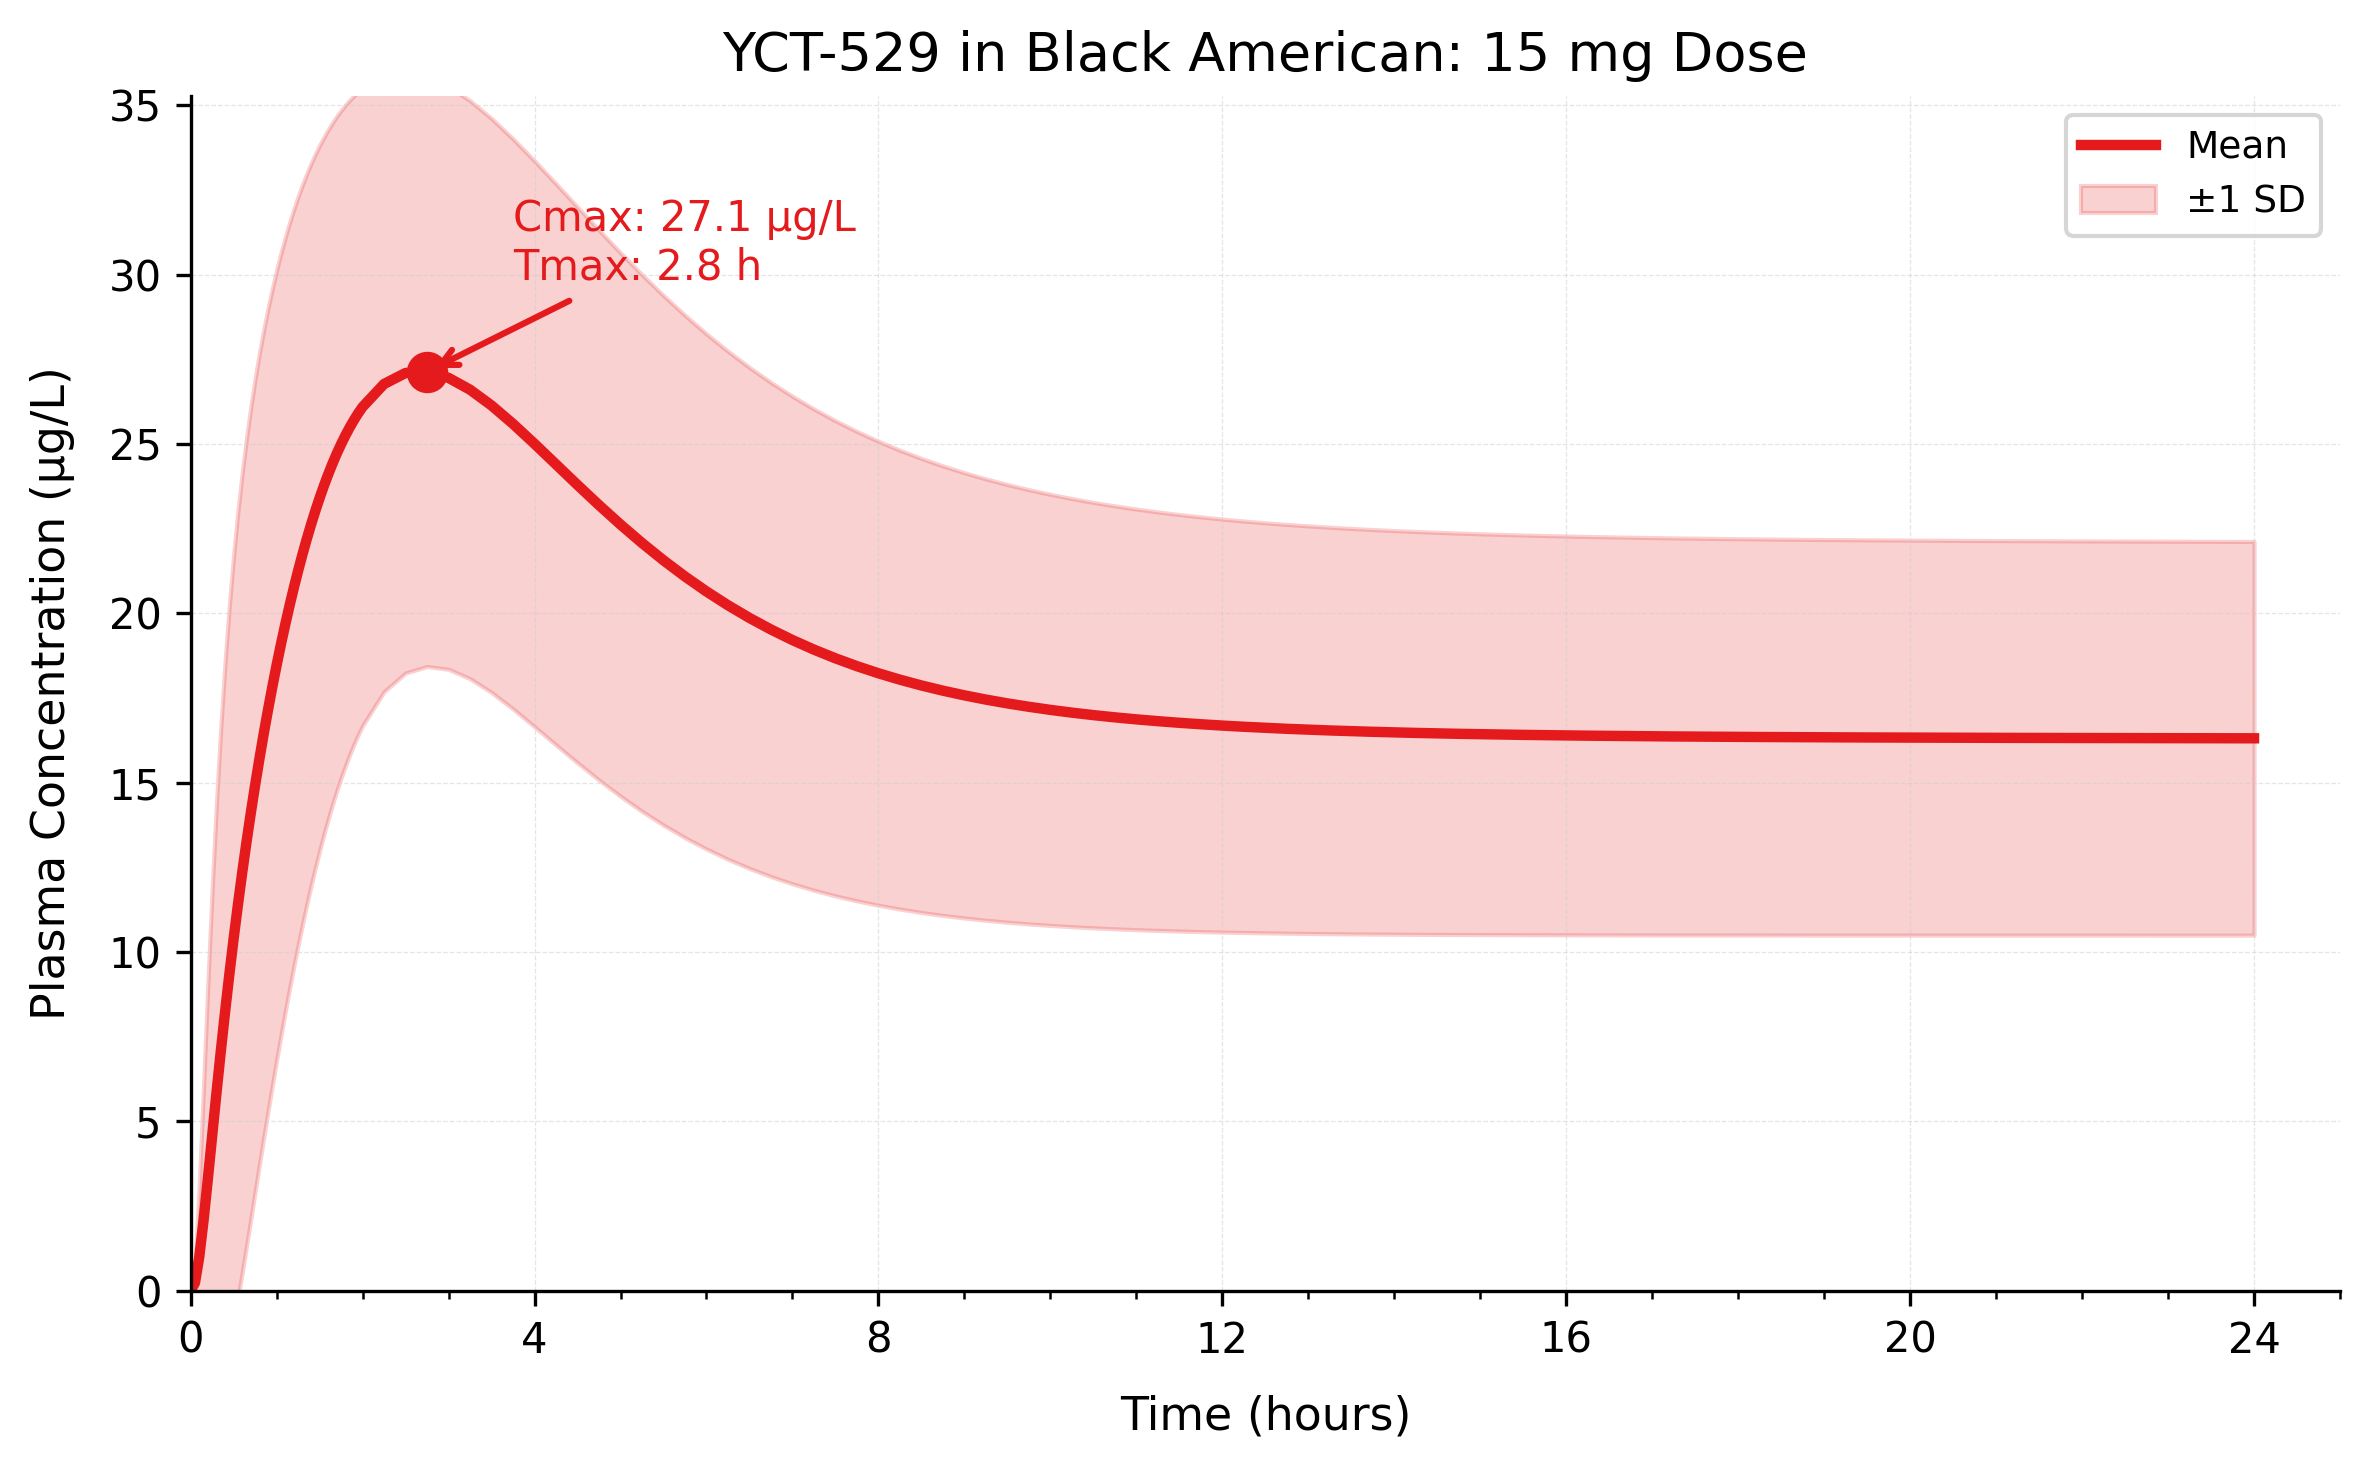

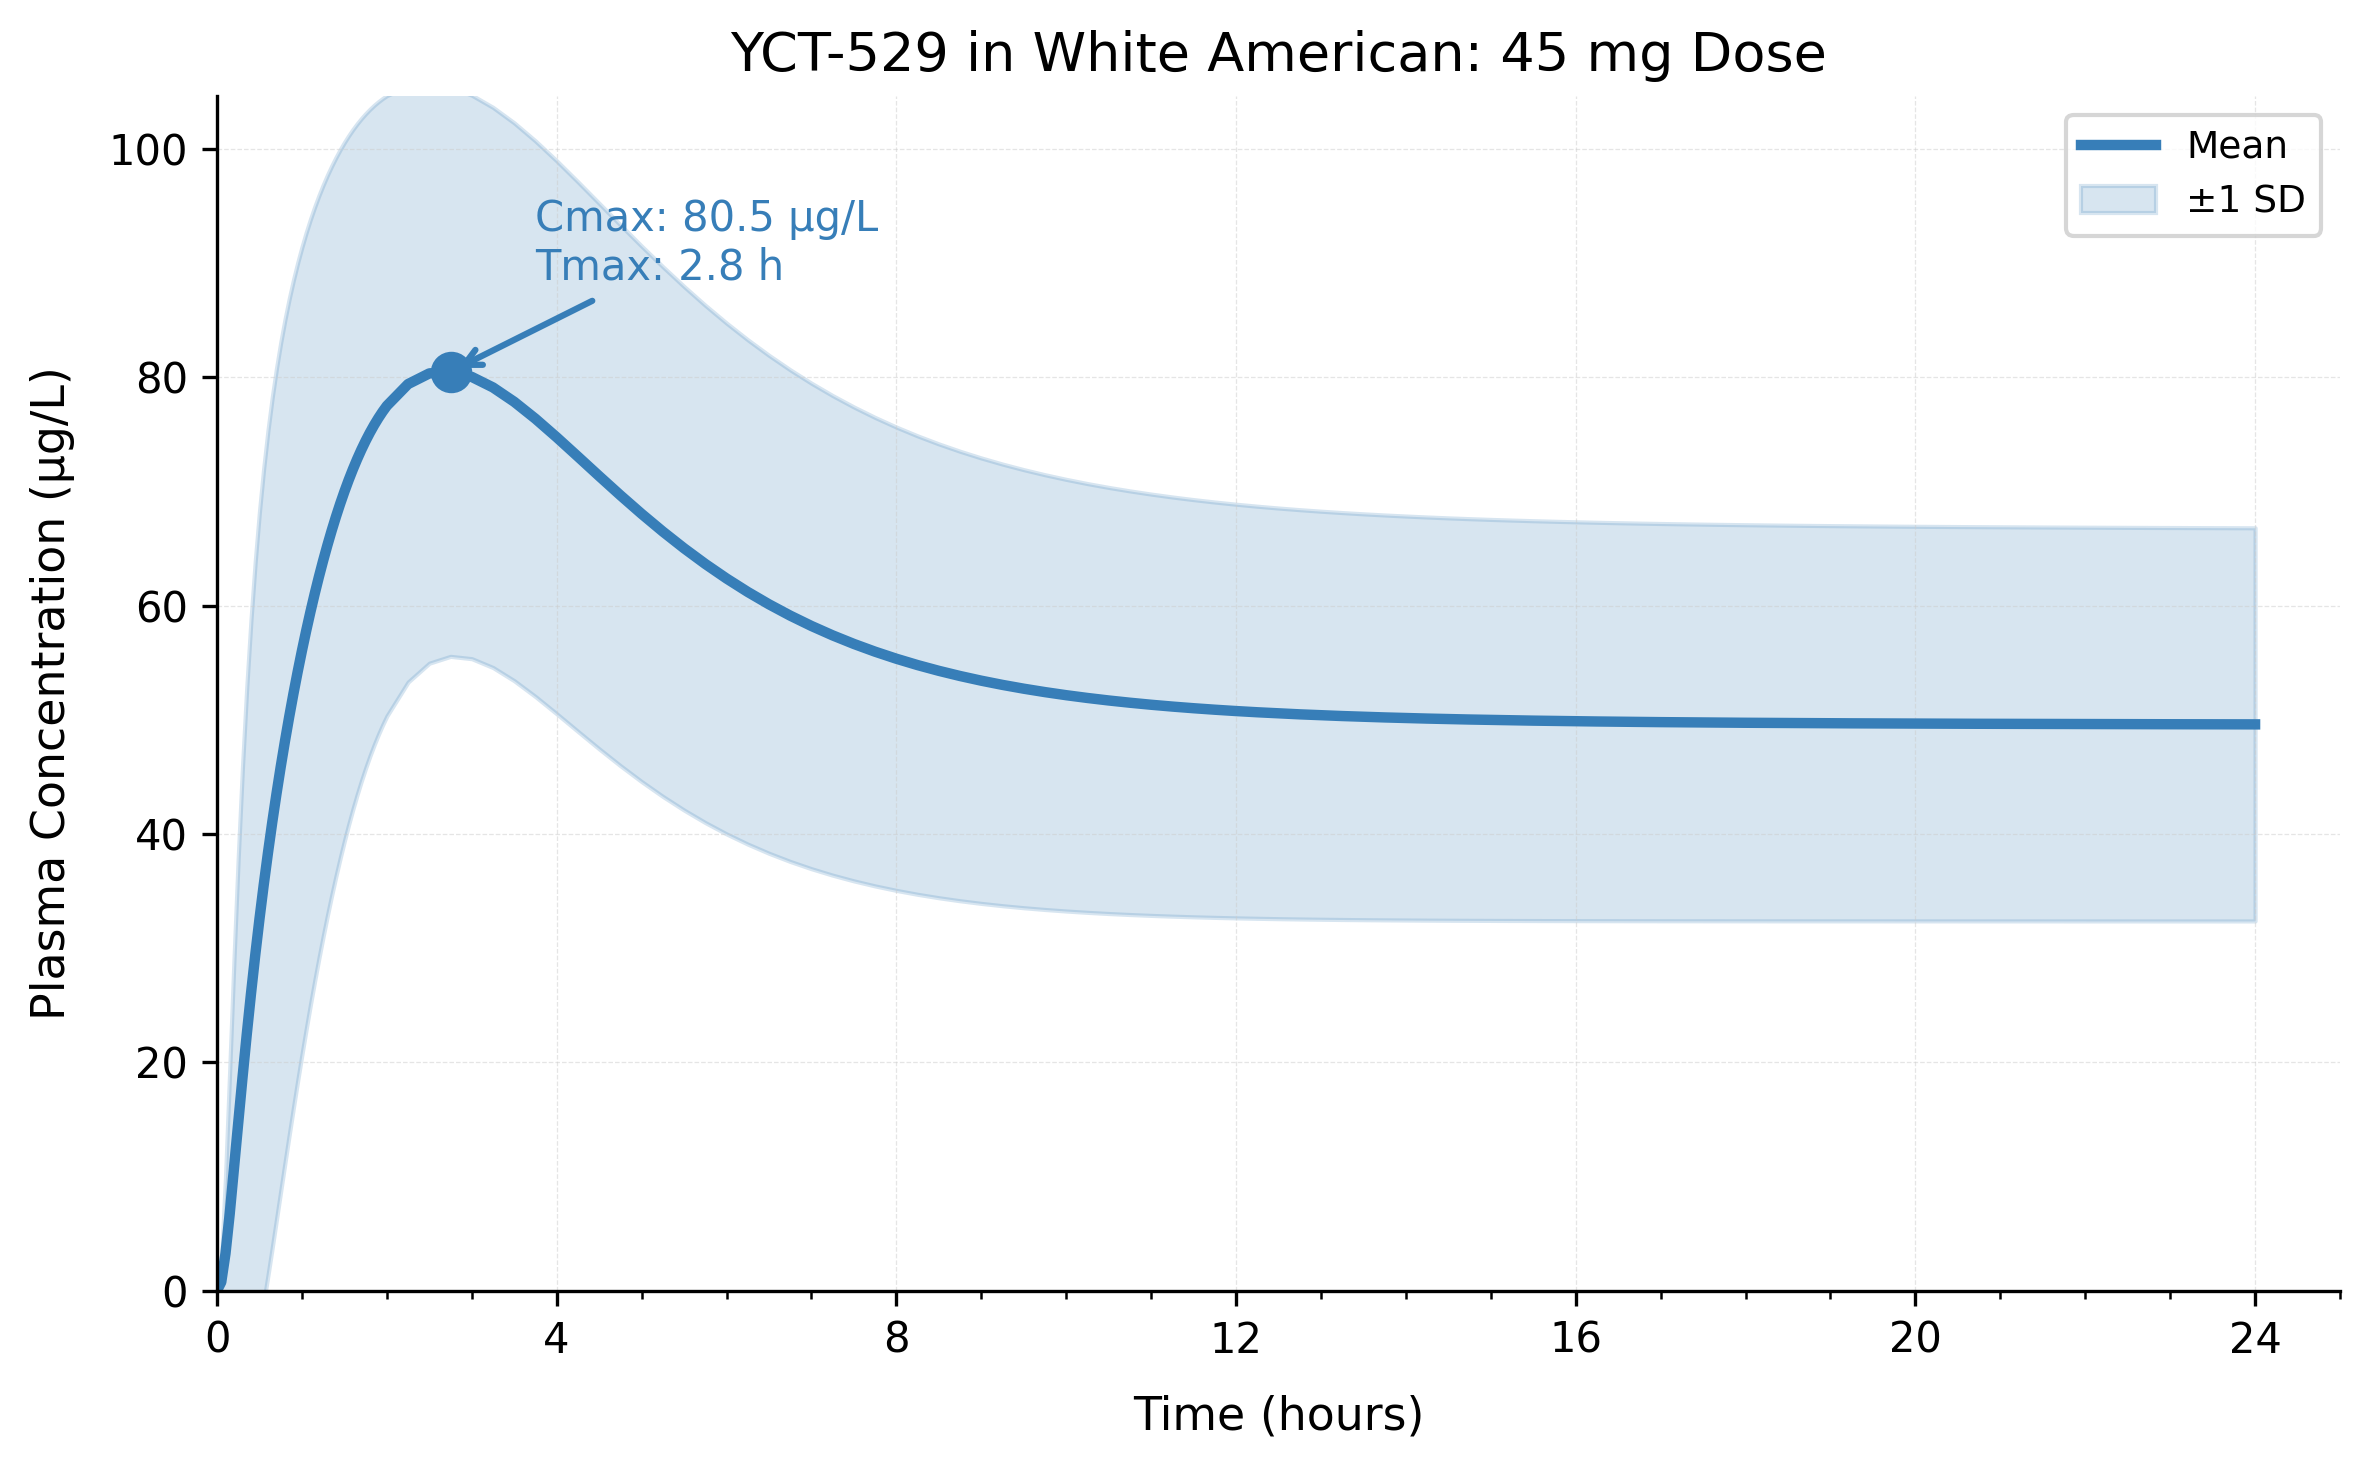

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# Set publication-quality parameters
plt.rcParams.update({
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 11,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'legend.fontsize': 9,
    'figure.dpi': 300
})

# Define file paths for the two populations we want to plot
file_paths = {
    "Black American": "BAM Aggregated Sim Protocol-Results.csv",
    "White American": "WAM Aggregated Sim Protocol-Results.csv"
}

# Define dose to population mapping
dose_population = {
    "Black American": 15,  # 15mg for BAM
    "White American": 45   # 45mg for WAM
}

# Define colorblind-friendly colors
colors = {
    "Black American": "#e41a1c",  # Red
    "White American": "#377eb8"   # Blue
}

# Process and plot data for each population separately
for population, file_path in file_paths.items():
    # Create a new figure for each population
    plt.figure(figsize=(8, 5))

    # Load results data
    df_results = pd.read_csv(file_path)

    # Convert time from minutes to hours
    df_results["Time (hours)"] = df_results["Time [min]"] / 60

    # Get target dose for this population
    target_dose = dose_population[population]

    # Filter for the target dose
    df_dose = df_results[df_results["Dosage (mg)"] == target_dose]

    # Group by time and compute mean concentration and standard deviation
    grouped = df_dose.groupby("Time (hours)")["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"]
    mean_conc = grouped.mean() * 435.5  # Convert µmol/L to µg/L using molecular weight
    std_conc = grouped.std() * 435.5    # Convert std dev to µg/L

    # Plot mean concentration
    plt.plot(mean_conc.index, mean_conc,
            color=colors[population],
            linewidth=2.5,
            label=f"Mean")

    # Plot shaded area for standard deviation
    plt.fill_between(mean_conc.index,
                    mean_conc - std_conc,
                    mean_conc + std_conc,
                    color=colors[population],
                    alpha=0.2,
                    label=f"±1 SD")

    # Find Cmax and its time
    cmax_time = mean_conc.idxmax()
    cmax_value = mean_conc.max()

    # Add Cmax annotation
    plt.scatter(cmax_time, cmax_value, color=colors[population], s=80, zorder=5)
    plt.annotate(f"Cmax: {cmax_value:.1f} µg/L\nTmax: {cmax_time:.1f} h",
                xy=(cmax_time, cmax_value),
                xytext=(cmax_time + 1, cmax_value * 1.1),
                arrowprops=dict(arrowstyle="->", color=colors[population], lw=1.5),
                fontsize=10,
                color=colors[population])

    # Formatting the plot
    plt.xlabel("Time (hours)", fontsize=11, labelpad=8)
    plt.ylabel("Plasma Concentration (µg/L)", fontsize=11, labelpad=8)
    plt.title(f"YCT-529 in {population}: {target_dose} mg Dose", fontsize=13)

    # Set axis limits
    plt.xlim(0, 25)
    plt.ylim(0, mean_conc.max() * 1.3)  # Add 30% padding above the max value

    # Add grid
    plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5, color='#CCCCCC')

    # Remove top and right spines
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

    # Set consistent tick marks
    plt.gca().xaxis.set_major_locator(MultipleLocator(4))
    plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

    # Add legend
    plt.legend(loc='upper right')

    # Adjust layout
    plt.tight_layout()

    # Save the figure with high DPI
    plt.savefig(f'YCT529_{population.replace(" ", "_")}_{target_dose}mg.png', dpi=600, bbox_inches='tight')
    plt.savefig(f'YCT529_{population.replace(" ", "_")}_{target_dose}mg.pdf', bbox_inches='tight')

# Close all figures
plt.show()